In [1]:
! pip install --upgrade "kaleido==0.1.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 MB 5.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

%matplotlib inline

# Load and Describe Data

---------

## Load Data

Dataset yang kita gunakan adalah "Used Car Auction Prices" yang berasal dari Kaggle

In [3]:
dfcar = pd.read_csv('https://drive.google.com/uc?id=1KfTnuIeppn-b5bdMyIvVVbII_P7m1Tnu', on_bad_lines="skip")
dfcar.head(3)

year make     model        trim   body transmission                vin  \
0  2015  Kia   Sorento          LX    SUV    automatic  5xyktca69fg566472   
1  2015  Kia   Sorento          LX    SUV    automatic  5xyktca69fg561319   
2  2014  BMW  3 Series  328i SULEV  Sedan    automatic  wba3c1c51ek116351   

  state  condition  odometer  color interior  \
0    ca        5.0   16639.0  white    black   
1    ca        5.0    9393.0  white    beige   
2    ca        4.5    1331.0   gray    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america, inc  20500         21500   
1                 kia motors america, inc  20800         21500   
2  financial services remarketing (lease)  31900         30000   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)

**List fitur pada dataset adalah sebagai berikut :**

1. Year : Tanggal produksi dari mobil.
2. Make : Merk dari mobil.
3. Model : Edisi dari tiap merk mobil.
4. Trim : Versi trim dari mobil.
5. Body : Tipe bentuk dari mobil.
6. Transmission : Transmisi yang digunakan pada mobil.
7. VIN : Vehicle Identification Number.
8. State : Negara bagian tempat mobil dijual.
9. Condition : Kondisi dari mobil pada saat dijual.
10. Odometer : Jarak tempuh mobil semenjak tanggal manufacture.
11. Color : Warna eksterior dari mobil.
12. Interior : Warna interior dari mobil.
13. Seller : Penjual dari mobil (Car dealers).
14. **MMR : Manhiem Market Record, market yang memprediksi harga mobil.**
15. Sellingprice : Nilai jual mobil.
16. Saledate : Tanggal mobil dijual.

## Data Exploration

In [4]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


1. Total dari data ada 558811 entries
2. Tipe dari data int, float dan object, dan terlihat sudah sesuai dengan kolomnya. Namun, untuk kolom `saledate` tipe data yang awalnya 'object', dirasa perlu diubah ke date time.
3. Terdapat nilai Null pada beberapa fitur

In [5]:
# Mengecek null value
dfcar.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Terdapat 9 fitur yang memiliki Null value, yaitu `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`. Perlu diadakan tindak lanjut di Data Cleaning

In [6]:
# Mengecek duplicated rows
dfcar.duplicated().sum()

0

Dataset tidak memiliki data duplikat sehingga tidak diperlukan penanganan.

In [7]:
# Mengkategorikan fitur sesuai dari tipe data
num = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cat = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

# Membatasi angka setelah koma hingga hanya 3 angka
pd.set_option('display.float_format', lambda x: '%.3f' % x)

dfcar[num].describe()

year  condition   odometer        mmr  sellingprice
count 558811.000 547017.000 558717.000 558811.000    558811.000
mean    2010.039      3.425  68323.196  13769.325     13611.262
std        3.967      0.949  53397.753   9679.875      9749.657
min     1982.000      1.000      1.000     25.000         1.000
25%     2007.000      2.700  28374.000   7100.000      6900.000
50%     2012.000      3.600  52256.000  12250.000     12100.000
75%     2013.000      4.200  99112.000  18300.000     18200.000
max     2015.000      5.000 999999.000 182000.000    230000.000

1. `condition` memiliki value antara 1-5.
2. Nilai dari `odometer` terlihat memiliki jarak yang jauh antara min dan max dimana nilai min nya adalah 1 dan max nya hampir 1 juta. Tentu ini adalah hal yang terkesan janggal. Selain itu, nilai mean dan median nya juga terhitung sangat jauh yaitu 16000.
3. Secara keseluruhan, nilai `mmr` dan `sellingprice` tidak terlalu berbeda. Namun, nilai min-max dan mean-median nya sangat jauh, sehingga perlu diperhatikan lebih lanjut untuk tahap berikutnya.
4. Beberapa kolom di fitur numerical juga terdapat null value, sehingga perlu ditangani pada tahap berikutnya.

In [8]:
dfcar[cat].describe()

make   model    trim    body transmission                vin  \
count   548510  548412  548160  545616       493458             558811   
unique      96     973    1975      86            2             550296   
top       Ford  Altima    Base   Sedan    automatic  wbanv13588cz57827   
freq     93554   19349   55817  199437       475914                  5   

         state   color interior              seller  \
count   558811  558062   558062              558811   
unique      38      20       17               14264   
top         fl   black    black  nissan-infiniti lt   
freq     82945  110970   244325               19693   

                                       saledate  
count                                    558811  
unique                                     3745  
top     Tue Feb 10 2015 01:30:00 GMT-0800 (PST)  
freq                                       5334

1. Dari data diatas, kita bisa melihat secara sekilas nilai apa yang paling teratas, sering muncul, dan berapa jumlah unique value dari masing-masing fitur.
2. Sebagai contoh, Ford merupakan `make` yang paling populer diantara 96 total brand lain. Selain itu, mobil `body` sedan juga termasuk yang paling favorit.
3. `transmission` automatic lebih dicari customer dibanding manual dengan jumlah lebih dari 90%.
4. Warna hitam tetap mendominasi baik di eksterior maupun interior.

----------

# EDA (Exploratory Data Analysis)

-------

## UNIVARIATE ANALYSIS

Pada tahap EDA, kita akan menganalisis baik analisis univariate ataupun multivariate. Pada univariate analysis, kami menganalisis fitur-fitur yang sekiranya memberikan dampak besar terhadap harga jual mobil. Tak hanya itu, kami juga memvisualisasikan bagaimana persebaran data pada dataset baik ditinjau dari outliers, skewness, null value, dll.

### Unique Value From Some Features

In [9]:
dfcar['year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983])

Semua value sudah sesuai, yaitu berupa angka yang dimulai dari tahun 1982 hingga 2015.

In [10]:
dfcar['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

Terdapat null value pada fitur `make`.
Value dari kolom `make` masih terlalu beragam dimana terdapat kata yang huruf awal kapital, kata yang berisi kapital semua, kata yang berisi lower case semua. Oleh karena itu, kita akan mengubah value nya menjadi lower case semua di tahap berikutnya. Hal yang sama mungkin saja juga terjadi pada fitur tipe obejct lainnya.

In [11]:
dfcar['trim'].unique()

array(['LX', '328i SULEV', 'T5', ..., 'pure', 'EWB', 'Power Wagon'],
      dtype=object)

Fitur `trim` memiliki lebih dari 1000 values sehingga unique value yang muncul hanya beberapa.

In [12]:
dfcar['condition'].unique()

array([5. , 4.5, 4.1, 4.3, 1. , 3.4, 2. , 4.2, 3. , 4.8, nan, 4.9, 1.7,
       1.9, 2.9, 3.8, 4.4, 4.7, 3.2, 4. , 2.5, 3.7, 3.9, 3.1, 2.8, 4.6,
       3.6, 3.5, 2.6, 2.1, 2.2, 2.7, 2.4, 3.3, 2.3, 1.5, 1.6, 1.8, 1.2,
       1.4, 1.1, 1.3])

Untuk kondisi mobil bervariasi dari 1 sampai 5, serta terdapat null value.

### Outlier Numerik (year, condition, odometer, MMR, sellingprice)

In [13]:
# Melihat penampilan outlier

plt.figure(figsize=(6, 3))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(dfcar[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

Dapat dilihat bahwa `mmr` dan `selling price` memiliki outlier paling banyak, begitu juga dengan kolom odometer dan year. Untuk kuartil dan mediannya pun juga terkesan jauh. Hal ini dapat terjadi karena banyaknya data mobil (500k++) sehingga nilai mmr dan selling price mapun odometer juga sangat bervariasi. Kolom yang terlihat paling normal hanyalah kolom 'condition'. Hasil analisis ini merupakan bentuk visual dari statistik data yang telah kita lakukan sebelumnya pada tahap Data Exploration.

### Distribusi Data (year, condition, odometer, MMR, sellingprice)

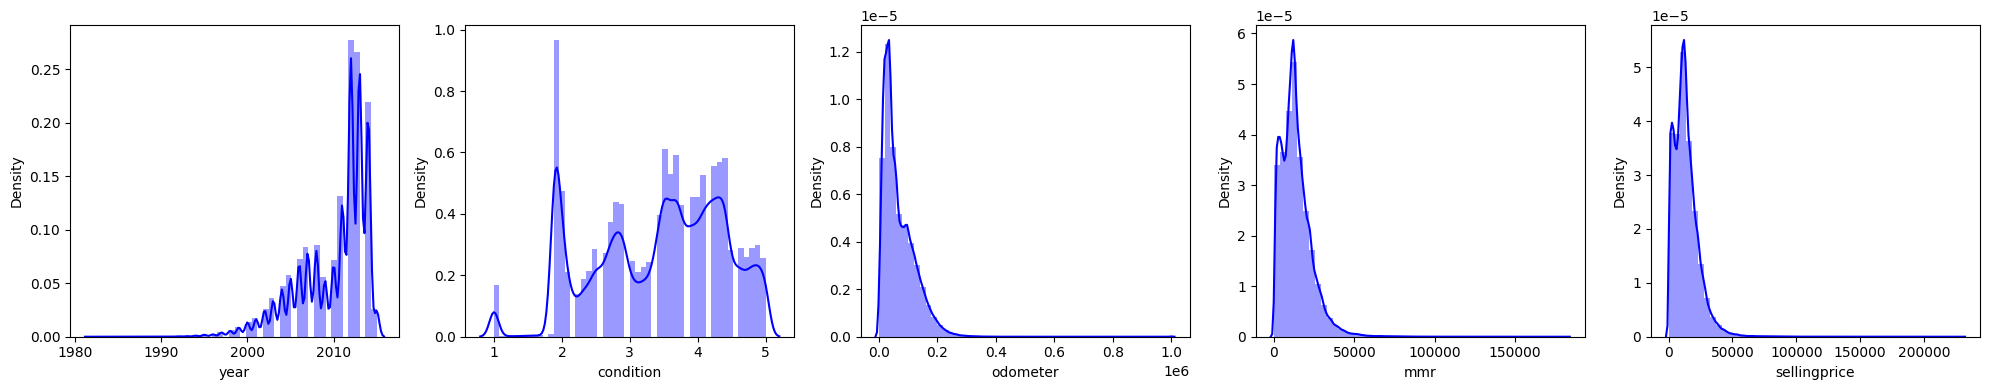

In [14]:
# Melihat grafik distribusi

plt.figure(figsize=(20, 4))
for i in range(0, len(num)):
    plt.subplot(1, 5, i+1)
    sns.distplot(dfcar[num[i]], color='blue')
    plt.tight_layout()

Dari grafik diatas dapat terlihat :
1. Dari kolom `year` kita bisa melihat bahwa penjualan cenderung mengalami peningkatan pada setiap tahunnya dan puncak penjualan berada di antara tahun 2010 hingga 2015. Kita juga bisa melihat bahwa kolom `year` termasuk left-skewed.
2. Pada grafik `condition`, kondisi mobil yang berada di kisaran angka 2 menjadi mayoritas dari kondisi lainnya. Hal ini menunjukkan bahwa kondisi mobil bekas bernilai kurang baik. Namun, tidak sedikit juga kondisi mobil yang bernilai 3 keatas hingga 4.
3. Untuk `odometer` dapat terlihat bahwa mayoritas berada di angka 0 hingga 0.2 yang artinya odometer berkisar antara 0 hingga 200k. Sedangkan untuk pemakaian mobil diatas 200k terhitung jarang.
4. Kolom `mmr` dan `sellingprice` terlihat serupa dimana harga jual mobil berkisar di angka 0-50000.
5. Dari kolom-kolom diatas, kolom `odometer`, `mmr`, dan `sellingprice` termasuk right-skewed.

### Check Nilai Min dan Max

Seperti analisis sebelumnya dimana kita menemukan nilai min dan max yang terkesan tidak masuk akal, maka kita akan mengecek lebih lanjut data yang mengandung nilai tersebut.  

Beberapa kolom tersebut adalah 'odometer', 'mmr', dan 'sellingprice'.

**1. Nilai min dan max dari kolom Odometer**

In [15]:
min_odo = dfcar[dfcar['odometer'] == 1.000]
min_odo.sample(3)

year      make     model  trim   body transmission                vin  \
473400  2000       NaN       NaN   NaN    NaN    automatic  1gtdm19w5yb505776   
84433   2002  Cadillac  Escalade  Base    SUV    automatic  1gyek63n42r110875   
252739  2007     Honda     Civic    EX  Coupe    automatic  2hgfg12837h529562   

       state  condition  odometer  color interior  \
473400    wa      2.000     1.000  white     gray   
84433     fl      2.000     1.000  white     gray   
252739    tx      1.800     1.000  white      tan   

                                                  seller   mmr  sellingprice  \
473400          volunteers of america western washington  4200          1100   
84433   autonation chrysler dodge jeep ram pembroke pine  5425          3200   
252739                          san antonio credit union  7825          2100   

                                       saledate  
473400  Wed May 27 2015 06:15:00 GMT-0700 (PDT)  
84433   Tue Jan 06 2015 16:00:00 GMT-0800 (PST)  
252739  Wed Feb 04 2015 04:30:00 GMT-0800 (PST)

In [16]:
max_odo = dfcar[dfcar['odometer'] == 999999.000]
max_odo.sample(3)

year   make       model       trim   body transmission  \
240950  2003   Ford  Expedition  XLT Value    SUV    automatic   
13568   2009  Dodge     Charger       Base  Sedan    automatic   
451991  2007   Ford      Taurus  SEL Fleet  Sedan    automatic   

                      vin state  condition   odometer  color interior  \
240950  1fmru15w03lc00745    ca      2.000 999999.000  white     gray   
13568   2b3ka43dx9h521300    tx      1.000 999999.000   blue    black   
451991  1fafp56u27a127873    ms      1.900 999999.000  white      tan   

                    seller   mmr  sellingprice  \
240950       800 loan mart   700           900   
13568   santander consumer  4150          5500   
451991        gm financial    75           750   

                                       saledate  
240950  Tue Feb 03 2015 05:00:00 GMT-0800 (PST)  
13568   Thu Jan 08 2015 14:10:00 GMT-0800 (PST)  
451991  Thu May 28 2015 03:30:00 GMT-0700 (PDT)

Dari data min dan max kolom 'odometer' diatas terlihat bahwa data tersebut tidak hanya mengandung nilai min dan max yang jauh tetapi pada kolom lain juga tidak normal. Hal tersebut bisa dilihat dari sample diatas dimana baris min dan max tersebut juga banyak mengandung null value, nilai mmr dan selling price yang rendah, dan kondisi yang tidak bagus.

**2. Nilai Min Selling Price**

In [17]:
min_price = dfcar[dfcar['sellingprice'] == 1.000]
min_price

year           make             model   trim          body  \
7566    2002           Ford  F-350 Super Duty    XLT      Crew Cab   
48453   2003  Mercedes-Benz           E-Class   E500         Sedan   
293223  2014           Ford      E-Series Van  E-250  E-Series Van   
348252  1995          Isuzu             Rodeo     LS           SUV   

       transmission                vin state  condition   odometer  color  \
7566            NaN  1ftsw31f52ed16477    ca      2.000        NaN  white   
48453     automatic  wdbuf70j73a269529    ga      2.100      1.000  black   
293223    automatic  1ftne2ew6eda13643    tx      4.100  31886.000  white   
348252          NaN  4s2cm58v9s4375559    va      1.000 254132.000    red   

       interior                      seller    mmr  sellingprice  \
7566       gray                 laa leasing   7850             1   
48453     black  peoples credit company inc   7325             1   
293223     gray                      u-haul  20800             1   
348252     gray  automotive remarketing inc    375             1   

                                       saledate  
7566    Thu Feb 05 2015 04:00:00 GMT-0800 (PST)  
48453   Tue Jan 06 2015 09:30:00 GMT-0800 (PST)  
293223  Thu Feb 12 2015 03:00:00 GMT-0800 (PST)  
348252  Wed Mar 04 2015 01:05:00 GMT-0800 (PST)

**3. Nilai Min dari MMR**

In [18]:
min_mmr = dfcar[dfcar['mmr'] == 25.000]
min_mmr.sample(3)

year       make    model  trim     body transmission  \
28688   2000  Chevrolet    Tahoe    LS      SUV    automatic   
205709  1997     Nissan   Maxima   GLE    Sedan    automatic   
300744  2003  Chevrolet  Venture  Base  Minivan    automatic   

                      vin state  condition   odometer  color interior  \
28688   1gnec13t4yj164096    sc        NaN 347449.000  white     gray   
205709  jn1ca21d3vt870132    fl      1.900 220607.000  black      tan   
300744  1gndu03e83d176473    ga      1.900 252396.000  white     gray   

                               seller  mmr  sellingprice  \
28688          five star florence llc   25           900   
205709  autonation nissan orange park   25           300   
300744                 nalley hyundai   25           600   

                                       saledate  
28688   Thu Dec 18 2014 10:00:00 GMT-0800 (PST)  
205709  Tue Jan 27 2015 10:00:00 GMT-0800 (PST)  
300744  Tue Feb 17 2015 05:00:00 GMT-0800 (PST)

Dari data diatas, dimana nilai mmr hanya 25 juga terdapat kejanggalan pada kolom yang lainnya, yaitu banyak terdapat null value, nilai sellingprice yang tergolong kecil, serta kondisi yang tidak bagus. Data-data tersebut akan ditangani kemudian pada tahap data cleansing.

### Data Insight
Beberapa data insight lainnya yang didapat dari univariate analysis

In [19]:
# Mengelompokan berdasarkan make (merk atau brand)
top_make = dfcar.groupby('make').size().sort_values(ascending= False).reset_index(name='count')
top_make

make  count
0         Ford  93554
1    Chevrolet  60197
2       Nissan  53946
3       Toyota  39871
4        Dodge  30710
..         ...    ...
91  chev truck      1
92     ford tk      1
93   airstream      1
94  hyundai tk      1
95    mazda tk      1

[96 rows x 2 columns]

Terlihat bahwa merk mobil paling favorit adalah Ford, lalu selanjutnya disusul oleh Chevrolet, Nissan, Toyota, Dodge, dst. Yang uniknya adalah perbedaan mobil-mobil n-teratas dan n-terbawah sangatlah jauh dimana n-teratas menyentuh angka puluhan ribu sedangkan n-terbawah hanya 1 mobil.

In [20]:
# Mengelompokan berdasarkan model
top_model = dfcar.groupby('model').size().sort_values(ascending= False).reset_index(name='count')
top_model

model  count
0     Altima  19349
1      F-150  14479
2     Fusion  12946
3      Camry  12545
4     Escape  11861
..       ...    ...
968    Paseo      1
969       Q3      1
970  Ram Van      1
971  Regency      1
972        1      1

[973 rows x 2 columns]

Terlihat bahwa top model mobil bekas adalah Altima dan top 2 adalah F-150. Hal ini juga sama seperti analisis merk mobil sebelumnya dimana selisih n-teratas dan n-terbawah sangatlah jauh.

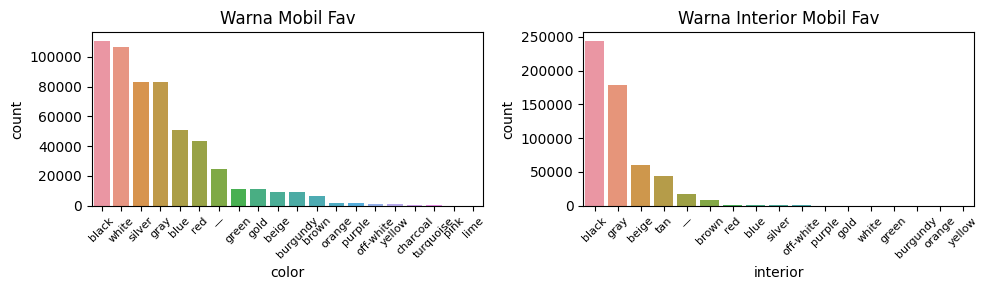

In [21]:
# Mengelompokan berdasarkan warna mobil dan warna interior
color = dfcar.groupby('color').size().sort_values(ascending= False).reset_index(name= 'count')
interior = dfcar.groupby('interior').size().sort_values(ascending= False).reset_index(name= 'count')

#visualisasi
plt.figure(figsize= (10, 3))

plt.subplot(1,2,1)
sns.barplot(data=color, x='color', y='count')
plt.title('Warna Mobil Fav')
plt.xticks(rotation= 45, size= 8)

plt.subplot(1,2,2)
sns.barplot(data=interior, x='interior', y='count')
plt.title('Warna Interior Mobil Fav')
plt.xticks(rotation= 45, size= 8)
plt.tight_layout()

Dapat terlihat bahwa :
1. Untuk warna mobil dan warna interior mobil paling disukai adalah warna hitam.
2. Terlihat juga bahwa warna interior mobil yang lazim digunakan adalah hitam, abu-abu, beige, dan tan.
3. Terdapat wrong value ( - ) pada warna dan interior mobil sehingga perlu dilakukan penanganan pada tahap berikutnya.

## MULTIVARIATE ANALYSIS

### Melihat Korelasi Antar Fitur Numerik

In [22]:
# Plot korelasi heatmap
corr_matrix = dfcar.corr()
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

1. Korelasi antara 'year' dan 'sellingprice' adalah positif, menunjukkan bahwa semakin baru mobil, semakin tinggi harga jualnya.

2. Kolom 'condition' memiliki korelasi positif dengan 'sellingprice', yang berarti semakin baik kondisi mobil, semakin tinggi harga jualnya.

3. Kolom 'odometer' memiliki korelasi negatif dengan 'sellingprice', menunjukkan bahwa semakin sedikit jarak tempuh, semakin tinggi harga jualnya.

4. Kolom 'mmr' memiliki korelasi positif yang cukup kuat dengan 'sellingprice', menunjukkan bahwa harga jual yang diprediksi oleh MMR memiliki korelasi yang baik dengan harga jual aktual.  

5. Kolom ‘Year’ dan ‘Odometer’ juga menunjukkan korelasi negative yang cukup tinggi, artinya mobil keluaran terbaru memiliki odometer yang cenderung kecil

### Korelasi MMR dan Selling Price

Seperti hasil analisis sebelumnya yang menunjukkan bahwa nilai MMR dan Selling Price memiliki kemiripan yang tinggi, maka kita akan coba memvisualisasikan bagaimana hubungan keduanya.

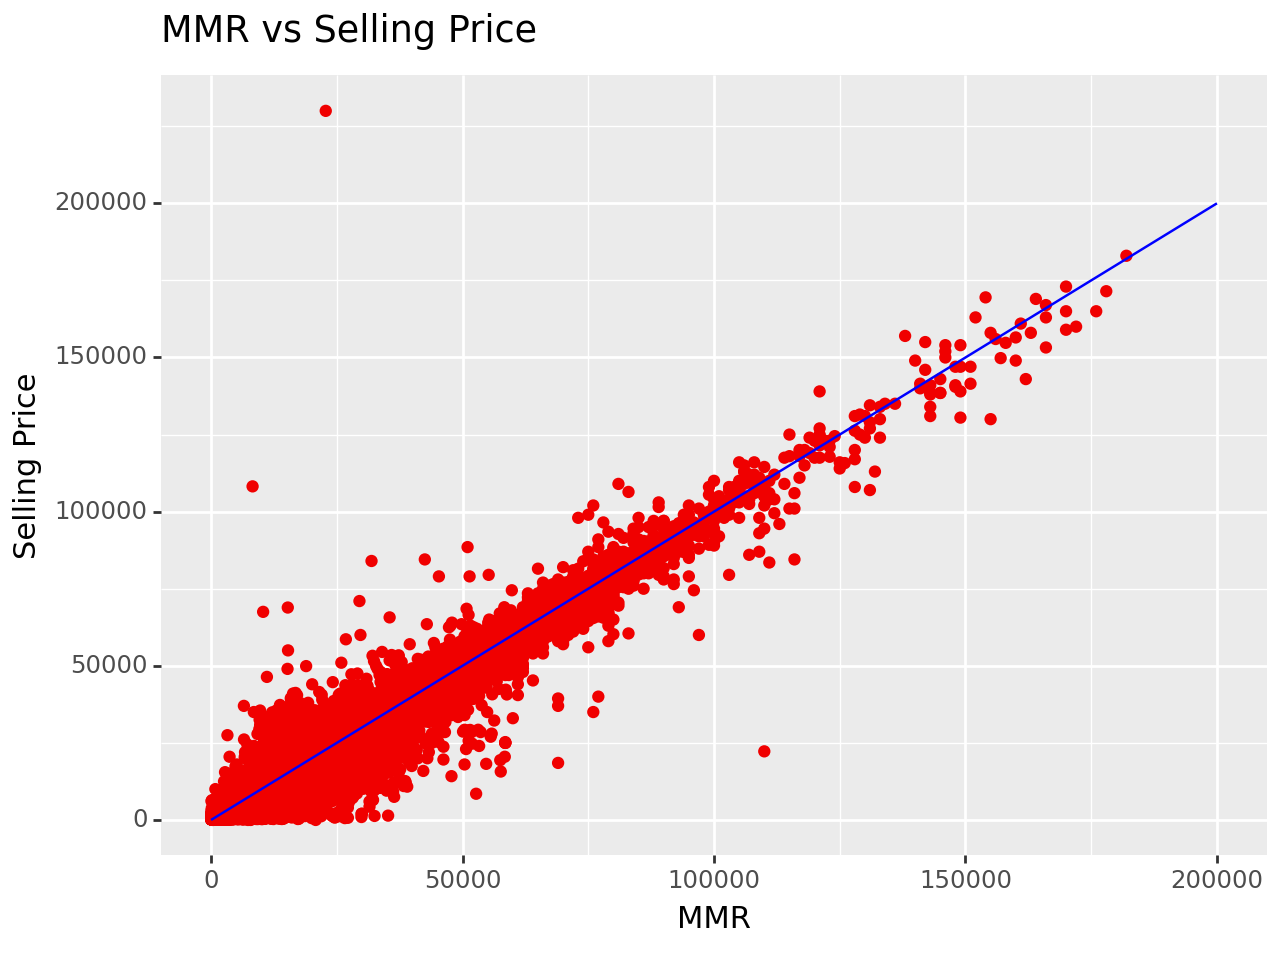

<Figure Size: (640 x 480)>

In [23]:
from plotnine import *

# Visualisasi MMR dan Selling Price
(ggplot(dfcar)
 + aes(x ='mmr', y ='sellingprice')
 + geom_point(color='#f00000')
 + labs(title='MMR vs Selling Price', x='MMR', y='Selling Price')
 + annotate(geom = "segment", x = 0, xend = 200000, y = 0, yend = 200000, color='blue')
)

Grafik diatas menunjukkan bagaimana persebaran selling price terhadap MMR.  
MMR merupakan singkatan dari Manhiem Market Report yaitu sebuah spesific report yang menjadi indikator wholesale price untuk penjualan kendaraan. Perhitungan harga didasarkan pada lebih dari 10 juta transaksi penjualan selama 13 bulan sebelumnya dengan harga yang tepat oleh penjualan kendaraan nyata di Manheim auction houses.
Sehingga, bisa dikatakan bahwa MMR layak untuk dijadikan acuan harga.

### Korelasi Condition dan MMR Berdasar Tahun

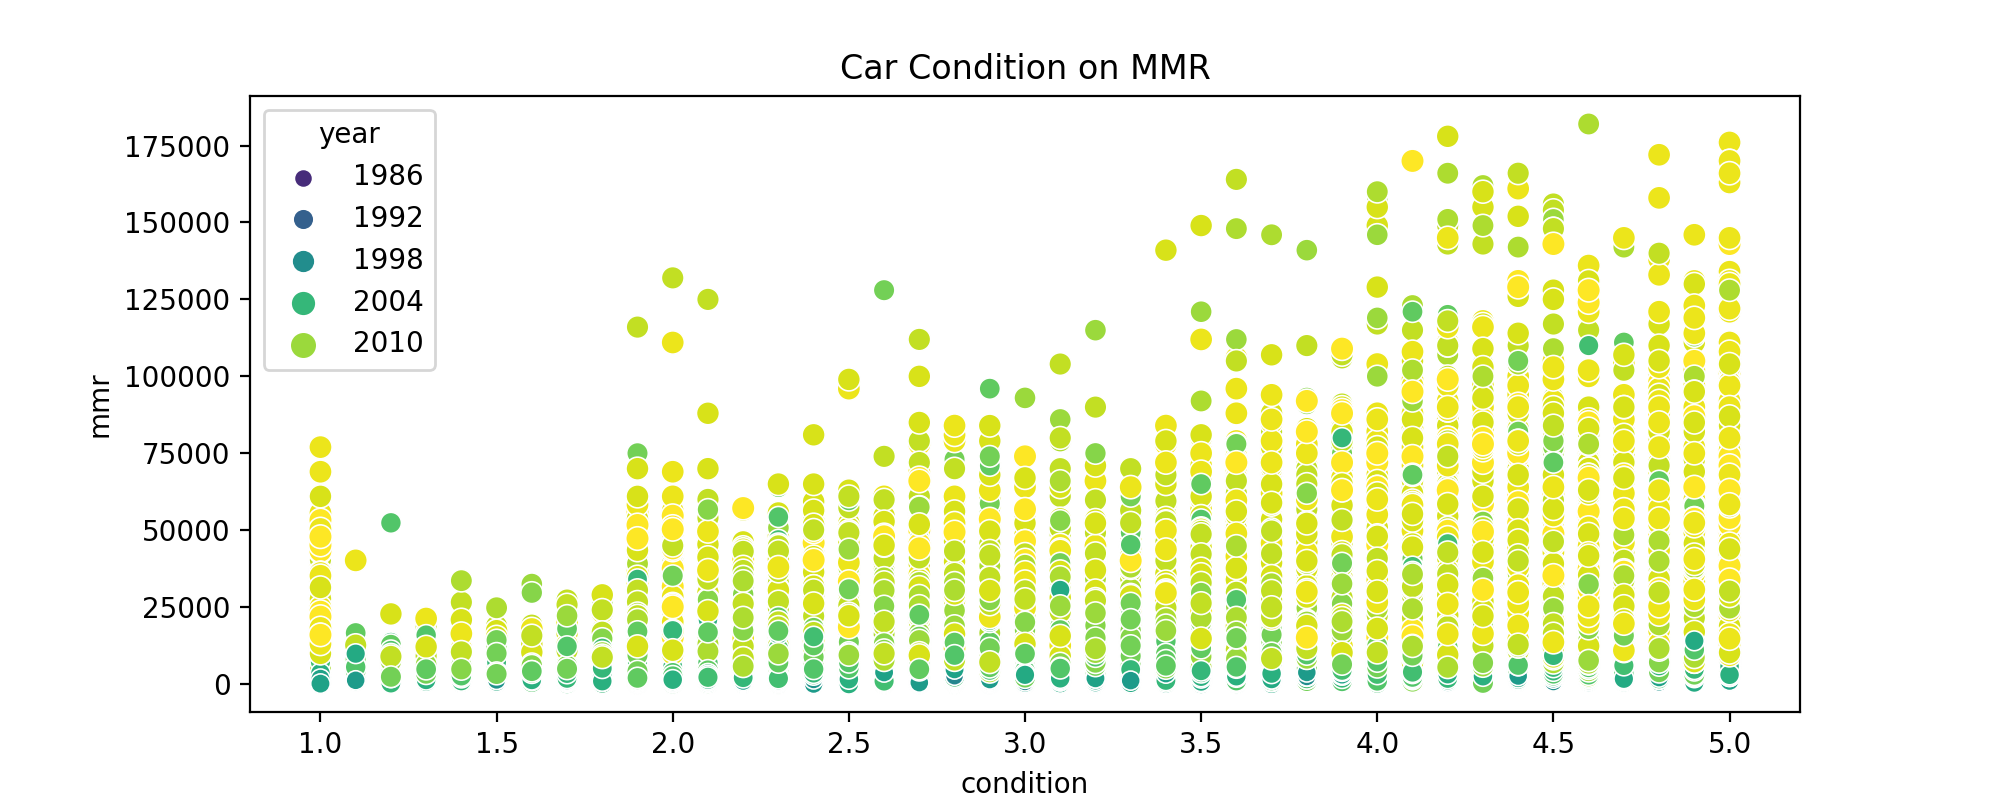

In [24]:
# Visualisasi Harga Jual Terhadap Kondisi Mobil

plt.figure(figsize=(10, 4))
scatter = sns.scatterplot(data=dfcar, x='condition', y='mmr', hue='year', size= 'year', palette='viridis')
plt.title('Car Condition on MMR')
plt.show()

Dari grafik diatas dapat disimpulkan bahwa pada setiap rentang kondisi mobil dengan mmr yang relatif rendah, terdapat mobil keluaran tahun 2004 keatas. Hal itu bisa mengindikasikan bahwa banyak mobil keluaran tahun 2004 yang dijual bekas.
Selain itu, produksi mobil sejak 2010 mengalami kenaikan pada kondisi nya dan mmr yang semakin tinggi pula. Hal tersebut menunjukkan bahwa mmr memiliki pengaruh kuat terhadap bagus nya kondisi dan tahun produksi mobil.  

----------

# BUSINESS INSIGHT AND VISUALIZATION

Pada section ini, kami mencoba menggali insight bisnis dan memvisualisasikannya. Kami akan menggunakan dataset copy sebagai pembeda dalam proses pemodelan. Beberapa insight bisnis yang kami coba gali adalah :  
**1. Bagaimana persentase penjualan**  
Seperti analisis di awal memulai project, kami sempat mengatakan bahwa secara perhitungan sederhana terdapat sekitar 51% mobil terjual dengan harga dibawah MMR, dimana MMR merupakan harga acuan dalam dunia penjualan mobil bekas. Selanjutnya kami akan mencoba melakukan perhitungan kembali.

**2. Rata-rata Sales Dalam Periode Bulanan dan Harian**  
Lebih lanjut kami melihat bagaimana rata-rata sales dalam periode bulanan dan harian jika ditinjau dari acuan harga MMR. Hal ini bertujuan untuk mengetahui kapan terjadinya penjualan yang dibawah atau diatas harga MMR.

**3. Jumlah Transaksi Bulanan, Harian, dan Jam**  
Jumlah transaksi ini digunakan untuk mengetahui bagaimana customer behaviour jika ditinjau dari kapan mereka membeli mobil. Kita bisa mengetahui juga kapan memanfaatkan momentum untuk melakukan marketing ataupun meningkatkan strategi penjualan.

**4. Mobil-mobil yang Dijual Dengan Harga Dibawah MMR**  
Semakin mengerucut, akhirnya kita bisa melihat mobil-mobil apa saja yang paling banyak dijual dengan harga jual dibawah MMR. Ini akan semakin memudahkan tim bisnis dalam memperhitungkan strategi penjualan.

##1. Persentase Penjualan
Pertama kami akan menggunakan dataset copy untuk memisahkan penggalian insight dan pemodelan. Selanjutnya kami memisahkan fitur 'saledate' ke dalam beberapa spesific time, lalu akan mengkategorikan beberapa value pada fitur kategorikal untuk mempermudah proses perhitungan.

In [25]:
# Meng-copy dataset
copy = dfcar.copy()

# Kolom 'is_sold_below_mmr'
## Kolom yang berisi apakah mobil terjual dibawah MMR atau tidak (1=Ya, 0=Tidak)
copy['is_sold_below_mmr'] = copy.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)

# Menghitung persentase penjualan
transaction = copy.groupby('is_sold_below_mmr').agg({'vin':'count'}).rename({'vin':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

total_transaction  percentage
is_sold_below_mmr                               
0                             272386      48.740
1                             286425      51.260

In [26]:
copy.head(3)

year make     model        trim   body transmission                vin  \
0  2015  Kia   Sorento          LX    SUV    automatic  5xyktca69fg566472   
1  2015  Kia   Sorento          LX    SUV    automatic  5xyktca69fg561319   
2  2014  BMW  3 Series  328i SULEV  Sedan    automatic  wba3c1c51ek116351   

  state  condition  odometer  color interior  \
0    ca      5.000 16639.000  white    black   
1    ca      5.000  9393.000  white    beige   
2    ca      4.500  1331.000   gray    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america, inc  20500         21500   
1                 kia motors america, inc  20800         21500   
2  financial services remarketing (lease)  31900         30000   

                                  saledate  is_sold_below_mmr  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)                  0  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)                  0  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)                  1

In [27]:
def displayMeanSP(df):
    spAboveMMR=[]
    spBelowMMR=[]

    for index, row in df.iterrows():
      if row['is_sold_below_mmr'] == 1:
        spBelowMMR.append(row['sellingprice'])
      else:
        spAboveMMR.append(row['sellingprice'])

    print(f'Mean of Selling Price above MMR = {sum(spAboveMMR)/len(spAboveMMR)}')
    print(f'Mean of Selling Price below MMR = {sum(spBelowMMR)/len(spBelowMMR)}')

displayMeanSP(copy)

Mean of Selling Price above MMR = 14754.737728811318
Mean of Selling Price below MMR = 12523.834148555468


## 2. Rata-rata Sales Terhadap MMR

In [28]:
timeget = []
for i in copy['saledate'].str.split():
    time_split = i[:5]
    date_string = ' '.join(time_split)
    timeget.append(date_string)
copy['datetime'] =  pd.to_datetime(timeget)

In [29]:
# Mengubah tipe data object ke datetime
copy['datetime'] =  pd.to_datetime(timeget)

copy['hour'] = copy['datetime'].apply(lambda time: time.strftime('%H:%M:%S'))
copy['month'] = copy['datetime'].apply(lambda time: time.month)
copy['day of week'] = copy['datetime'].apply(lambda time: time.dayofweek)

In [30]:
# Mapping spesific day of week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
copy['day of week'] = copy['day of week'].map(dmap)
copy.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  ... interior  \
0  5xyktca69fg566472    ca      5.000 16639.000  ...    black   
1  5xyktca69fg561319    ca      5.000  9393.000  ...    beige   
2  wba3c1c51ek116351    ca      4.500  1331.000  ...    black   
3  yv1612tb4f1310987    ca      4.100 14282.000  ...    black   
4  wba6b2c57ed129731    ca      4.300  2641.000  ...    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america, inc  20500         21500   
1                 kia motors america, inc  20800         21500   
2  financial services remarketing (lease)  31900         30000   
3                 volvo na rep/world omni  27500         27750   
4  financial services remarketing (lease)  66000         67000   

                                  saledate is_sold_below_mmr  \
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)                 0   
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)                 0   
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)                 1   
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)                 0   
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)                 0   

             datetime      hour month  day of week  
0 2014-12-16 12:30:00  12:30:00    12          Tue  
1 2014-12-16 12:30:00  12:30:00    12          Tue  
2 2015-01-15 04:30:00  04:30:00     1          Thu  
3 2015-01-29 04:30:00  04:30:00     1          Thu  
4 2014-12-18 12:30:00  12:30:00    12          Thu  

[5 rows x 21 columns]

In [31]:
# Pembuatan beberapa kolom yang berkaitan dengan waktu:
## Kolom 'hour_only', khusus hanya mengeluarkan jam (kolom 'hour' bernilai jam:menit:detik)
copy['hour_only'] = copy['datetime'].dt.hour

## Membuat kolom 'month_year', khusus hanya bulan dan tanggal, tanpa jam (kolom 'datetime' bernilai tanggal dan jam)
copy['month_year'] = copy.datetime.dt.strftime('%b-%y')

## Membuat kolom 'date', khusus hanya tahun-bulan-tanggal, tanpa jam (kolom 'datetime' bernilai tanggal dan jam)
copy['date'] = copy['datetime'].dt.date
copy['date'] = pd.to_datetime(copy['date'], format = '%Y-%m-%d')

### Bulanan

Kita akan melihat bagaimana rata-rata penjualan terhadap MMR dalam periode bulanan. Data yang disajikan hanyalah sebagian sampel dari jangka waktu yang ada. Disini kami mengambil tiap quarter dari tahun 2014-2015 dimana dari hasil EDA sebelumnya terlihat bahwa banyak penjualan terjadi di tahun-tahun tersebut.

In [32]:
# Melakukan grouping berdasarkan kolom 'month_year'
monthly_sale_summary = copy.groupby(['month_year']).agg({'vin' : 'count', 'mmr' : ['sum', 'mean'], 'sellingprice' : ['sum', 'mean'] }).reset_index()
monthly_sale_summary.columns = ['date', 'total_transaction', 'mmr_sum', 'mmr_avg', 'selling_sum', 'selling_avg']

# Sorting Date secara manual
custom_dict = {'Jan-14':0, 'Feb-14':1, 'Dec-14':2, 'Jan-15':3, 'Feb-15':4, 'Mar-15':5, 'Apr-15':6, 'May-15':7, 'Jun-15':8, 'Jul-15':9}
monthly_sale_summary = monthly_sale_summary.sort_values(by=['date'], key=lambda x: x.map(custom_dict))

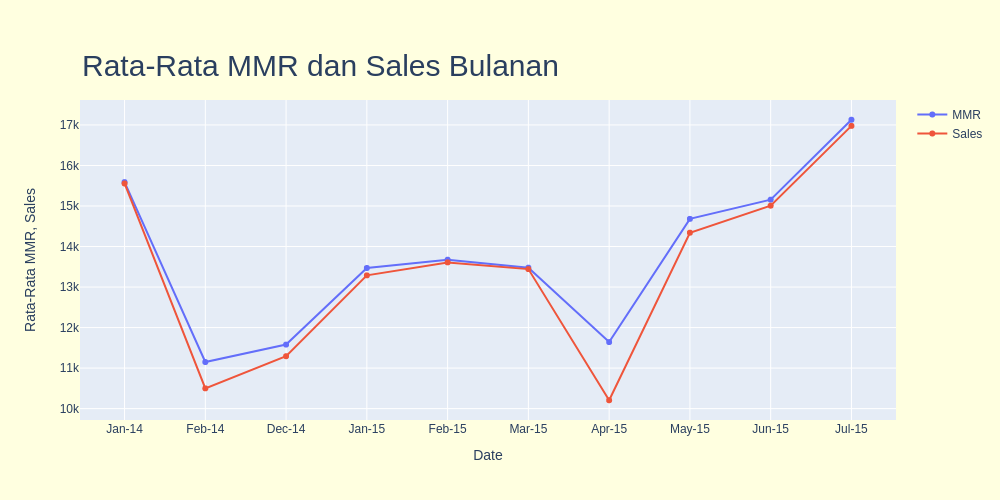

In [33]:
# Visualisasi Rata-rata Sales dan MMR Periode Bulanan
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_sale_summary.date, y=monthly_sale_summary.mmr_avg,name='MMR'))
fig.add_trace(go.Scatter(x=monthly_sale_summary.date, y=monthly_sale_summary.selling_avg, name='Sales'))

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom', text='Rata-Rata MMR dan Sales Bulanan', font=dict(family='Arial', size=30), showarrow=False))
fig.update_layout(autosize=False, width=1000, height=500, paper_bgcolor="LightYellow", annotations=annotations)

fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Rata-Rata MMR, Sales")

fig.show('png')

Jumlah rata – rata sales di setiap bulannya selalu lebih rendah daripada nilai MMR-nya.

### Harian

In [34]:
# Melakukan grouping berdasarkan kolom 'date'
daily_sale_summary = copy.groupby('date').agg({'vin' : 'count', 'mmr' : ['sum', 'mean'], 'sellingprice' : ['sum', 'mean'] }).reset_index()
daily_sale_summary.columns = ['date', 'total_transaction', 'mmr_sum', 'mmr_avg', 'selling_sum', 'selling_avg']

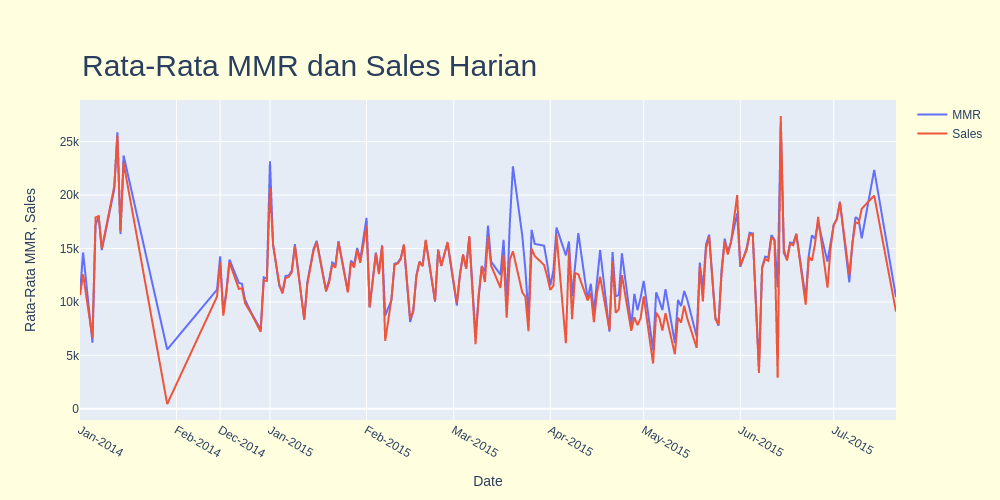

In [35]:
# Visualisasi Rata-rata Sales dan MMR Periode Harian

dt_breaks = pd.date_range(start='2014-02-15', end='2014-12-15', freq='D')
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_sale_summary.date,y =daily_sale_summary.mmr_avg, name='MMR'))

fig.add_trace(go.Scatter(x=daily_sale_summary.date, y=daily_sale_summary.selling_avg, name='Sales'))
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom', text='Rata-Rata MMR dan Sales Harian', font=dict(family='Arial', size=30), showarrow=False))
fig.update_layout(autosize=False, width=1000, height=500, paper_bgcolor="LightYellow", annotations=annotations)

# Set axis title
fig.update_xaxes(title_text="Date", rangebreaks=[dict(values=dt_breaks)], tickformat = '%b-%Y', dtick='M1')
fig.update_yaxes(title_text="Rata-Rata MMR, Sales")

fig.show('png')

Dari plot harian ini lebih dapat terlihat bahwa terdapat beberapa titik dimana penjualan mobil sama atau bahkan lebih tinggi dari pada MMR dibanding bila dilihat dari plot bulanan.

## 3. Jumlah Transaksi

### Jumlah Transaksi Bulanan

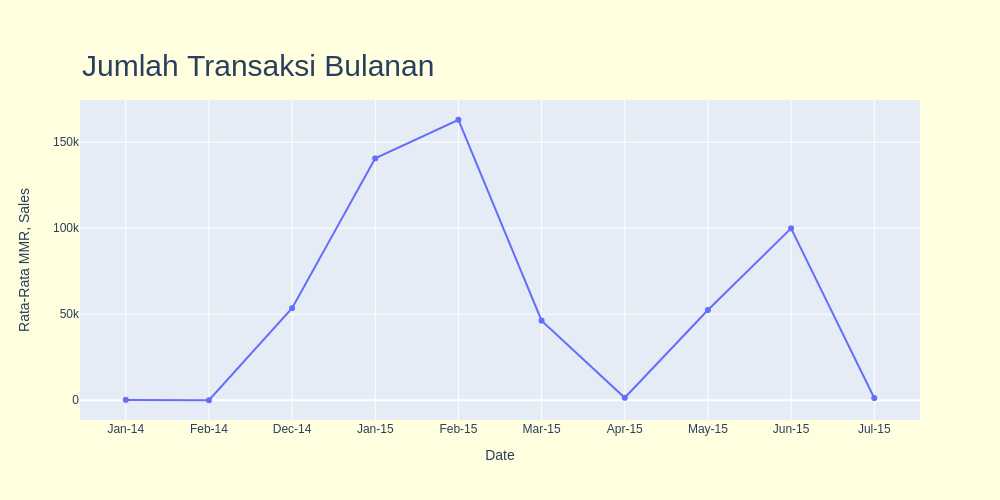

In [36]:
# Visualisasi Jumlah Transaksi Periode Bulanan
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_sale_summary.date, y=monthly_sale_summary.total_transaction, name='MMR'))
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom', text='Jumlah Transaksi Bulanan', font=dict(family='Arial', size=30), showarrow=False))
fig.update_layout(autosize=False, width=1000, height=500, paper_bgcolor="LightYellow", annotations=annotations)

# Set axis title
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Rata-Rata MMR, Sales")

fig.show('png')

Puncak transaksi terjadi pada Feb-2015 (Sekitar 160rb Transaksi), setelahnya terjadi penurunan transaksi hingga Apr-2015 dan kembali naik hingga Jun-2015.

### Jumlah Transaksi Berdasarkan Hari dan Jam

In [37]:
# Visualisasi Transaksi Harian dan Jam
week_hour = copy.pivot_table(index='day of week',columns='hour_only',values='vin',aggfunc='count')
week_hour = week_hour.reindex(index=['Mon','Tue', 'Wed','Thu', 'Fri', 'Sat', 'Sun'])
week_hour = week_hour.fillna(0)

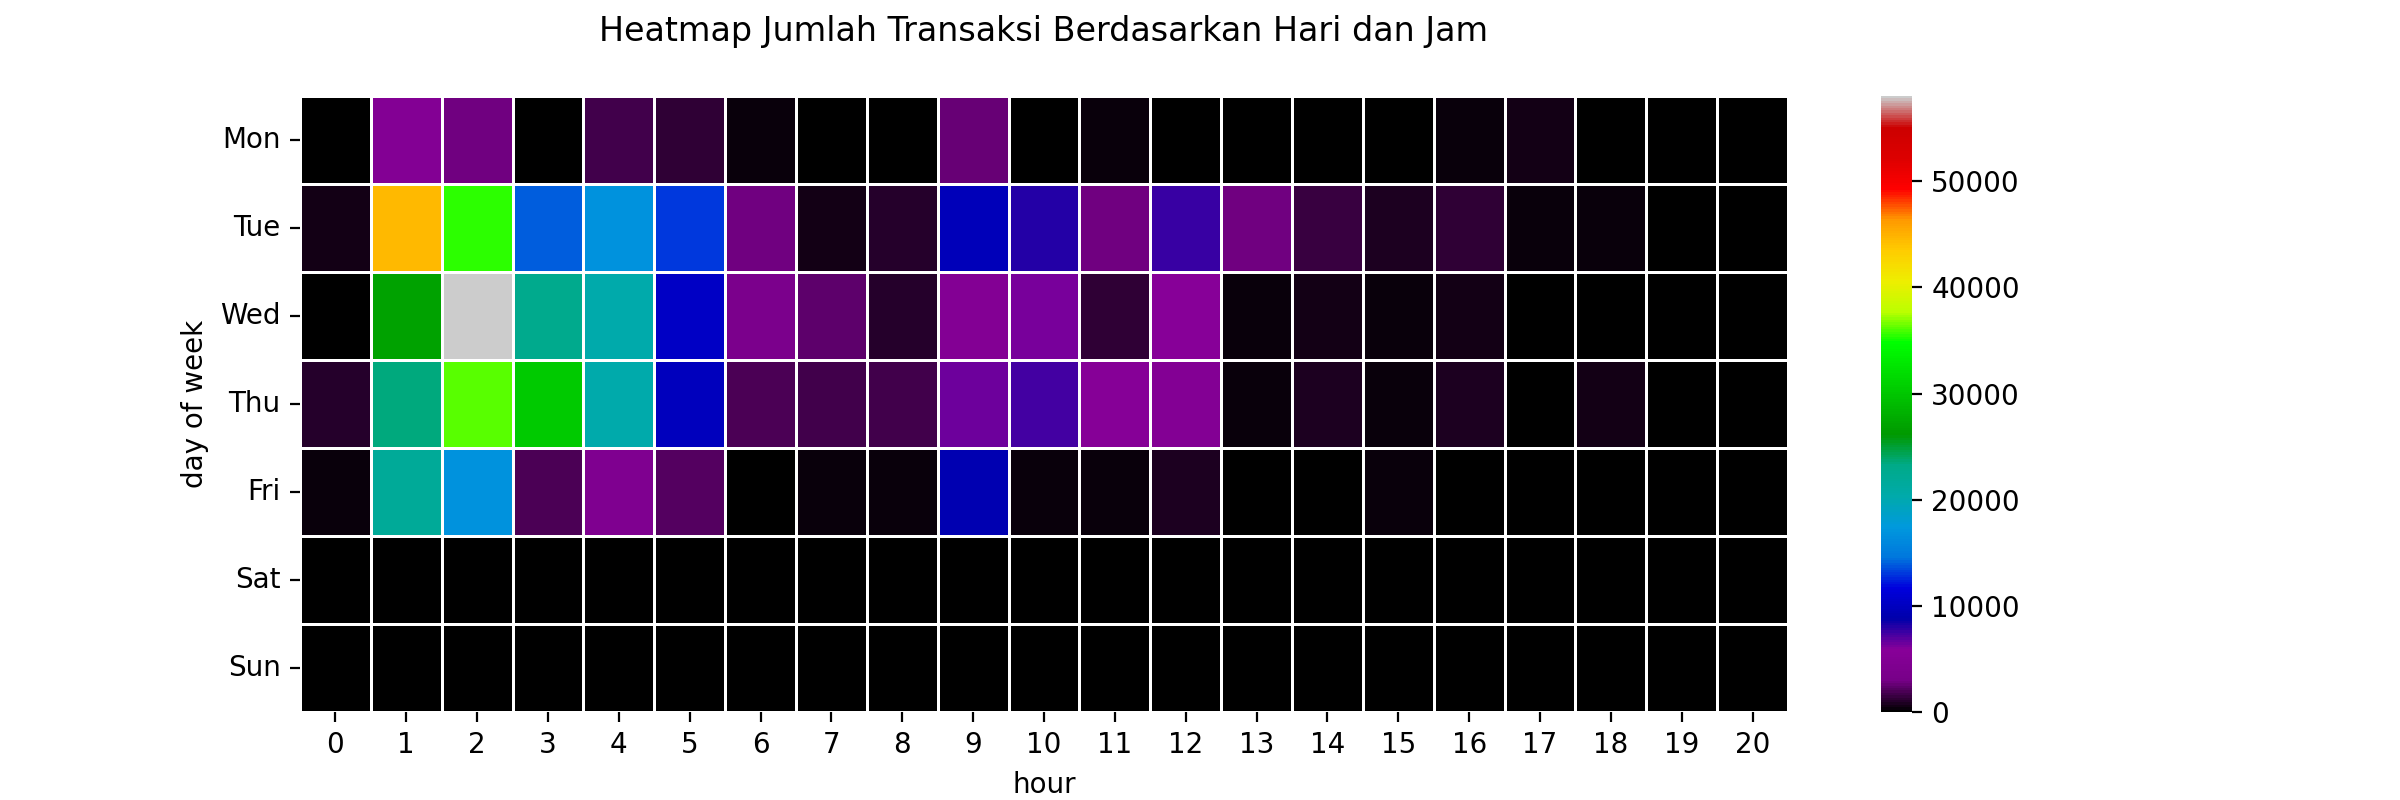

In [38]:
f, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(week_hour, cmap='nipy_spectral', annot=False, fmt="2f", linewidths=.5, ax=ax)
plt.title('Heatmap Jumlah Transaksi Berdasarkan Hari dan Jam\n')
plt.xlabel('hour')
plt.yticks(rotation=0)
plt.show()


Dari plot diatas, diperoleh informasi bahwa:

Transaksi lebih banyak dilakukan pada saat Weekdays  
Transaksi tergolong tinggi pada jam 1 – 5 dan 9 – 12  
Peak Transaksi terjadi pada saat jam 1 - 3

# Data Preparation

----

## Data Cleansing

### Dropping

**Duplicated Rows**

Pada tahap Data Exploration sebelumnya, terlihat bahwa tidak ada duplicate rows sehingga tidak perlu penanganan.

**Rows with Extreme Values**

Pada tahap EDA sebelumnya, kita menemukan baris-baris yang memiliki outliers ekstrim dan tidak masuk akal. Maka, di tahap data cleaning ini kita akan menghapus baris-baris tersebut.

In [39]:
# Drop min odo
i_min_odo = dfcar[((dfcar.odometer == 1.000))].index
dfcar = dfcar.drop(i_min_odo)

In [40]:
# Drop max odo
i_max_odo = dfcar[((dfcar.odometer == 999999.000))].index
dfcar = dfcar.drop(i_max_odo)

In [41]:
# Drop min sellingprice
i_min_price = dfcar[((dfcar.sellingprice == 1.000))].index
dfcar = dfcar.drop(i_min_price)

In [42]:
# Drop min mmr
i_min_mmr = dfcar[((dfcar.mmr == 25.000))].index
dfcar = dfcar.drop(i_min_mmr)

In [43]:
dfcar.shape

(557391, 16)

**Irrelevant Features**

Beberapa fitur terlihat kurang relevan dan unique value yang dimiliki terlalu luas seperti yang sudah kita analisis sebelumnya. Sehingga diasumsikan bahwa fitur tersebut tidak memiliki pola tertentu. Fitur tersebut adalah `vin`, `sellingprice`, dan `saledate` yang akan dihapus. Alasannya yaitu :  
a. `vin` bukanlah fitur yang menentukan harga mobil karena hanya berfungsi sebagai idetification number dari mobil.  
b. `sellingprice` memiliki korelasi tinggi (0.98) dengan `mmr` (fitur target).  
c. `saledate` tidak menunjukkan faktor yang cukup signifikan dikarenakan waktu yang terlalu luas dan tidak menentu sehingga tidak ada pola khusus yang mempengaruhi harga jual mobil.

In [44]:
dfcar = dfcar.drop(['vin','sellingprice','saledate'], axis=1)
dfcar.head(3)

year make     model        trim   body transmission state  condition  \
0  2015  Kia   Sorento          LX    SUV    automatic    ca      5.000   
1  2015  Kia   Sorento          LX    SUV    automatic    ca      5.000   
2  2014  BMW  3 Series  328i SULEV  Sedan    automatic    ca      4.500   

   odometer  color interior                                  seller    mmr  
0 16639.000  white    black                 kia motors america, inc  20500  
1  9393.000  white    beige                 kia motors america, inc  20800  
2  1331.000   gray    black  financial services remarketing (lease)  31900

### Handle Unique Values

Pada beberapa fitur terdapat banyak sekali unique values seperti yang sudah dieksplor sebelumnya. Kita akan menghandle unique values yang tidak seragam tersebut menjadi :  
1. Semua categorical data kecuali saledate akan diubah menjadi lower case untuk mendapatkan value yang bernilai sama.  
2. Nilai " — " pada fitur `color` dan `interior` akan diganti dengan nilai modus, yaitu black.  

In [45]:
def content_consistent(df):
    cols = df.select_dtypes(object).columns.difference(['saledate'])
    df[cols] = df[cols].apply(lambda x: x.str.lower())
    return df

dfcar = content_consistent(dfcar)

In [46]:
import re

# Replace color and interior
dfcar['color'].replace('—','black',inplace=True)
dfcar['interior'].replace('—','black',inplace=True)

# Replace model dan trim dgn menghilangkan special chars
dfcar['model'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)
dfcar['trim'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)
dfcar['seller'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)

# Replace same meaning of value
dfcar['make'].replace('landrover','land rover',inplace=True)
dfcar['make'].replace('mercedes-b','mercedes-benz',inplace=True)
dfcar['make'].replace('mercedes','mercedes-benz',inplace=True)
dfcar['make'].replace('vw','volkswagen',inplace=True)
dfcar['make'].replace('ford tk','ford truck',inplace=True)
dfcar['body'].replace('koup','coupe',inplace=True)
dfcar['body'].replace('regular-cab','regular cab',inplace=True)
dfcar['body'].replace('xtracab','extended cab',inplace=True)

In [47]:
c = ['make', 'model', 'trim', 'body', 'color', 'interior', 'state', 'seller']

dfcar[c].describe()

make   model    trim    body   color interior   state  \
count   547162  547064  546817  544286  556662   556662  557391   
unique      61     841    1883      42      19       16      38   
top       ford  altima    base   sedan   black    black      fl   
freq     93834   19322   55641  240696  135399   260895   82780   

                   seller  
count              557391  
unique              14152  
top     nissaninfiniti lt  
freq                19691

Setelah dilakukan pembersihan data dengan menyamaratakan penulisan string, maka terlihat hasilnya dimana:  
a. `make` yang awalnya 96 kini hanya 66 unique values  
b. `model` yang awalnya 973 kini hanya 841 unique values  
c. `trim` yang awalnya 1975 kini hanya 1883 unique values  
d. `body` yang awalnya 86 kini hanya 45 unique values   
e. `seller` yang awalnya 14264 kini hanya 14153 unique values  
f. `color` dan `interior` berkurang 1 nilai dari unique value sebelumnya dikarenakan sudah digantikan oleh nilai modus (black).  
g. `state` adalah satu-satunya yang masih bernilai sama.

### Handle Missing Values

Terdapat 9 fitur yang memiliki Null value, yaitu `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`.

Namun, dikarenakan fitur color dan interior telah dihapus, maka kita hanya perlu meng-handle fitur lainnya.  
1. Seluruh categorical data akan diisi dengan nilai modus.  
2.  `condition` yang memiliki persebaran data yang lumayan normal, maka akan diisi dengan nilai mean.
3. `odometer` yang hanya memiliki 94 null values, kita akan menghapusnya.

In [48]:
mode_value = dfcar.filter(['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']).mode()
cols = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']

dfcar[cols] = dfcar[cols].fillna(dfcar.mode().iloc[0])

In [49]:
dfcar['condition'] = dfcar['condition'].fillna(dfcar['condition'].mean())

In [50]:
dfcar.dropna(axis=0, inplace=True)
dfcar.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
dtype: int64

### Handle Outliers

In [51]:
df_clean = dfcar.copy()

In [52]:
def outlier_del(df, column, mode):
    q1 = df.iloc[:,column].quantile(0.25)
    q3 = df.iloc[:,column].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - (1.5 * iqr)
    upper_tail = q3 + (1.5 * iqr)
    nama_kolom = df.columns[column]
    jumlah_outliers = df[(df.iloc[:,column] <= lower_tail)|(df.iloc[:,column] >= upper_tail)].iloc[:,column].count()
    total_row = df.iloc[:,column].count()
    persentase_outliers = round(((jumlah_outliers/total_row)*100),2)
    if mode == 'summary':
        return print('Jumlah Outliers pada kolom ', nama_kolom, ' :', jumlah_outliers, ' dan persentase outliers:', persentase_outliers, '%')
    elif mode == 'df':
        return df[(df.iloc[:,column] >= lower_tail)&(df.iloc[:,column] <= upper_tail)]
    else :
        return print('periksa mode yang diinputkan')

In [53]:
# Memeriksa presentase outlier setiap kolom
column = [0, 7, 8, 12]

for i in range(0, len(column)):
    outlier_del(df_clean, column[i], 'summary')

Jumlah Outliers pada kolom  year  : 6025  dan persentase outliers: 1.08 %
Jumlah Outliers pada kolom  condition  : 0  dan persentase outliers: 0.0 %
Jumlah Outliers pada kolom  odometer  : 10270  dan persentase outliers: 1.84 %
Jumlah Outliers pada kolom  mmr  : 16307  dan persentase outliers: 2.93 %


In [54]:
# Menghapus outliers

df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar, 0, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar, 8, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar, 12, 'df').reset_index()['index'])]
df_clean.shape

(527806, 13)

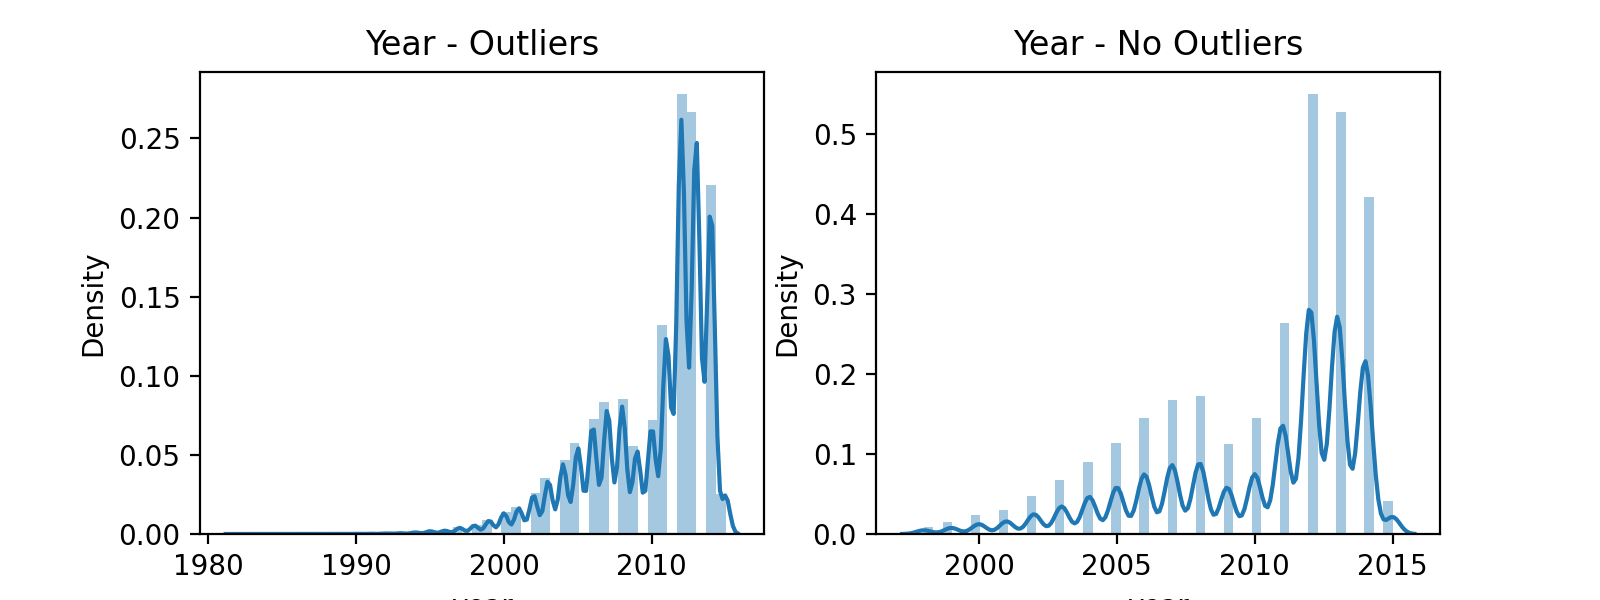

In [55]:
# Membuat Plot Untuk Membandingkan dengan kondisi sebelum penghapusan outlier
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar.year)
plt.title('Year - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.year)
plt.title('Year - No Outliers')
plt.show()

In [56]:
# Mengukur skewness sebelum dihandle outlier
print(f"Koefisien Skewness Awal year : {round(dfcar.year.skew(), 3)}")

# Mengukur skewness setelah dihandle outlier
print(f"Koefisien Skewness Baru year : {round(df_clean.year.skew(), 3)}")

Koefisien Skewness Awal year : -1.186
Koefisien Skewness Baru year : -1.017


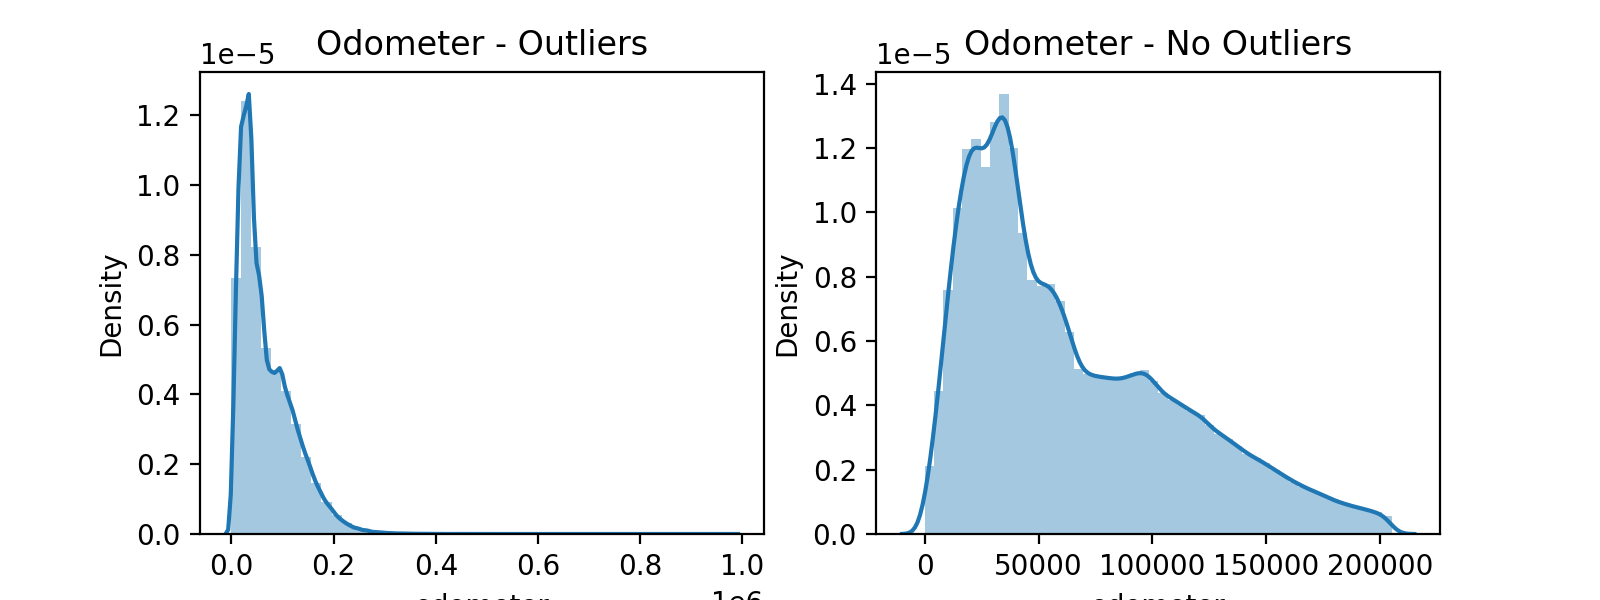

In [57]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar.odometer)
plt.title('Odometer - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.odometer)
plt.title('Odometer - No Outliers')
plt.show()

In [58]:
# Mengukur skewness sebelum dihandle outlier
print(f"Koefisien Skewness Awal odometer : {round(dfcar.odometer.skew(), 3)}")

# Mengukur skewness setelah dihandle outlier
print(f"Koefisien Skewness Baru odometer : {round(df_clean.odometer.skew(), 3)}")

Koefisien Skewness Awal odometer : 1.236
Koefisien Skewness Baru odometer : 0.841


In [59]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar.mmr)
plt.title('MMR - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.mmr)
plt.title('MMR - No Outliers')
plt.show()

In [60]:
# Mengukur skewness sebelum dihandle outlier
print(f"Koefisien Skewness Awal mmr : {round(dfcar.mmr.skew(), 3)}")

# Mengukur skewness setelah dihandle outlier
print(f"Koefisien Skewness Baru mmr : {round(df_clean.mmr.skew(), 3)}")

Koefisien Skewness Awal mmr : 1.998
Koefisien Skewness Baru mmr : 0.544


## Feature Engineering

### Feature Extraction

Dikarenakan pada dataset terdapat banyak fitur kategorikal, maka kita perlu mengubahnya terlebih dahulu menjadi angka. Namun sebelum itu, kita perlu melakukan fitur ekstraksi (feature extraction) untuk melihat pola-pola tertentu yang bisa menyederhanakan proses perubahan fitur nantinya (feature encoding).

#### Overall

In [61]:
df_yearcond = df_clean.groupby(['condition', 'odometer']).agg({'mmr' : ['mean','median']})
df_yearcond.describe()

mmr           
            mean     median
count 482570.000 482570.000
mean   12912.635  12907.897
std     7472.915   7473.601
min       50.000     50.000
25%     7200.000   7200.000
50%    12150.000  12150.000
75%    17600.000  17600.000
max    35100.000  35100.000

In [62]:
def segment(x):
    if x['odometer'] <= 7200:
        segment = 'Poor'
    elif x['odometer'] > 7200 and x['odometer'] <= 12150:
        segment = 'Fair'
    elif x['odometer'] > 12150 and x['odometer'] <= 17600:
        segment = 'Good'
    else:
        segment = 'Very Good'
    return segment

df_clean['Overall'] = df_clean.apply(lambda x: segment(x), axis=1)

#### Made In (Ekstraksi Fitur 'make')

Menyederhanakan value pada fitur `make` dengan mengkategorikan merk mobil sesuai asal negara pembuat nya.

In [63]:
# Brand mobil berdasarkan negara pembuat

us_made = ['chevrolet', 'ford', 'buick', 'cadillac', 'jeep', 'dodge', 'chrysler', 'ram', 'scion', 'pontiac', 'saturn', 'mercury', 'hummer', 'gmc', 'gmc truck',
           'oldsmobile', 'ford truck', 'lincoln', 'plymouth', 'airstream']
germany_made = ['bmw', 'audi', 'mercedes-benz', 'porsche', 'smart', 'chev truck', 'volkswagen']
japan_made = ['nissan', 'acura', 'lexus', 'infiniti', 'mitsubishi', 'mazda', 'toyota', 'subaru', 'honda', 'suzuki', 'isuzu', 'mazda tk']
uk_made = ['mini', 'land rover', 'jaguar']
italy_made = ['fiat', 'maserati']
korea_made = ['kia', 'hyundai', 'hyundai tk', 'daewoo']
swedia_made = ['volvo', 'saab']

made_in = []

for maker in df_clean['make']:
    if maker in us_made:
        country = 'US'
    elif maker in germany_made:
        country = 'DEU'
    elif maker in japan_made:
        country = 'JPN'
    elif maker in uk_made:
        country = 'UK'
    elif maker in italy_made:
        country = 'ITA'
    elif maker in korea_made:
        country = 'KOR'
    else:
        country = 'SWE'

    made_in.append(country)

df_clean['made_in'] = made_in

#### Top Make

In [64]:
top_make = df_clean.groupby('make')['year'].count().reset_index().sort_values('year', ascending=False)
top_make = top_make.iloc[:11]
top_make.drop('year', axis=1, inplace=True)
top_make['top_make'] = top_make['make']
top_make

make   top_make
13       ford       ford
7   chevrolet  chevrolet
36     nissan     nissan
48     toyota     toyota
10      dodge      dodge
17      honda      honda
19    hyundai    hyundai
25        kia        kia
8    chrysler   chrysler
3         bmw        bmw
24       jeep       jeep

In [65]:
df_clean = df_clean.merge(top_make, how='left', on='make')
df_clean['top_make'].fillna('Other', inplace=True)
df_clean['top_make'].unique()

array(['kia', 'bmw', 'Other', 'nissan', 'chevrolet', 'ford', 'hyundai',
       'jeep', 'toyota', 'dodge', 'chrysler', 'honda'], dtype=object)

#### Body Simplified (Ekstraksi Fitur 'body')

Mengkategorikan fitur `body` menjadi lebih sederhana.

In [66]:
# Kategori body mobil

cab = ['crew cab', 'double cab','crewmax cab', 'access cab','king cab','extended cab', 'supercab', 'regular cab','quad cab', 'club cab','mega cab','cab plus 4',  'cab plus']
coupe = ['coupe', 'q60 coupe', 'cts-v coupe', 'elantra coupe', 'genesis coupe', 'cts coupe', 'g37 coupe', 'g coupe']
wagon = ['wagon', 'cts wagon', 'cts-v wagon', 'tsx sport wagon']
suv = ['suv']
van = ['van', 'e-series van', 'promaster cargo van', 'ram van', 'transit van', 'minivan' ]
sedan = ['sedan', 'g sedan']
convertible = ['convertible', 'g37 convertible',  'q60 convertible', 'beetle convertible', 'g convertible']
hatchback = ['hatchback']
supercrew = ['supercrew']

body_cat = []

for b in df_clean['body']:
    if b in cab:
        btype = 'cab'
    elif b in coupe:
        btype = 'coupe'
    elif b in wagon:
        btype = 'wagon'
    elif b in suv:
        btype = 'suv'
    elif b in van:
        btype = 'van'
    elif b in sedan:
        btype = 'sedan'
    elif b in convertible:
        btype = 'convertible'
    elif b in hatchback:
        btype = 'hatchback'
    else:
        btype = 'supercrew'

    body_cat.append(btype)

df_clean['body_type'] = body_cat

#### Color Grouping (Ekstraksi Fitur 'color')

In [67]:
black = ['black']
white = ['white', 'off-white']
silgray = ['silver', 'gray', 'charcoal']
reds = ['red', 'burgundy']
blue = ['blue']
browns = ['brown', 'beige', 'gold']
others = ['orange', 'purple', 'yellow', 'turqoise', 'pink', 'lime', 'green']

color_cat = []

for c in df_clean['color']:
    if c in black:
        ctype = 'black'
    elif c in white:
        ctype = 'white'
    elif c in silgray:
        ctype = 'silgray'
    elif c in reds:
        ctype = 'reds'
    elif c in blue:
        ctype = 'blue'
    elif c in browns:
        ctype = 'browns'
    else:
        ctype = 'others'

    color_cat.append(ctype)

df_clean['co_lor'] = color_cat

#### Interior Grouping (Ekstraksi Fitur 'interior')

In [68]:
black = ['black']
gray = ['gray']
beige = ['beige']
tan = ['tan']

interior_cat = []

for i in df_clean['interior']:
    if i in black:
        itype = 'black'
    elif i in gray:
        itype = 'gray'
    elif i in beige:
        itype = 'beige'
    elif i in tan:
        itype = 'tan'
    else:
        itype = 'others'

    interior_cat.append(itype)

df_clean['inte_rior'] = interior_cat

### Feature Selection

Setelah semua fitur menjadi numerik, selanjutnya kita bisa menghapus kolom kategori awal dan kolom yang tidak diperlukan.

In [69]:
df_clean = df_clean.drop(['make', 'body', 'transmission', 'color', 'interior'], axis=1)
df_clean.head(3)

year     model        trim state  condition  odometer  \
0  2015   sorento          lx    ca      5.000 16639.000   
1  2015   sorento          lx    ca      5.000  9393.000   
2  2014  3 series  328i sulev    ca      4.500  1331.000   

                                 seller    mmr Overall made_in top_make  \
0                kia motors america inc  20500    Good     KOR      kia   
1                kia motors america inc  20800    Fair     KOR      kia   
2  financial services remarketing lease  31900    Poor     DEU      bmw   

  body_type   co_lor inte_rior  
0       suv    white     black  
1       suv    white     beige  
2     sedan  silgray     black

### Feature Encoding

#### One-Hot Encoding  

Melakukan OHE terhadap fitur yang sudah memiliki pola tertentu atau kategori kemiripan, namun bukan merupakan data ordinal.

In [70]:
df_pre = df_clean

In [71]:
# Melakukan One Hot Encoding karena data tidak memiliki urutan
df_pre = pd.get_dummies(df_pre, columns=['Overall', 'made_in', 'top_make','body_type', 'co_lor', 'inte_rior'])
df_pre.head(3)

year     model        trim state  condition  odometer  \
0  2015   sorento          lx    ca      5.000 16639.000   
1  2015   sorento          lx    ca      5.000  9393.000   
2  2014  3 series  328i sulev    ca      4.500  1331.000   

                                 seller    mmr  Overall_Fair  Overall_Good  \
0                kia motors america inc  20500             0             1   
1                kia motors america inc  20800             1             0   
2  financial services remarketing lease  31900             0             0   

   ...  co_lor_browns  co_lor_others  co_lor_reds  co_lor_silgray  \
0  ...              0              0            0               0   
1  ...              0              0            0               0   
2  ...              0              0            0               1   

   co_lor_white  inte_rior_beige  inte_rior_black  inte_rior_gray  \
0             1                0                1               0   
1             1                1                0               0   
2             0                0                1               0   

   inte_rior_others  inte_rior_tan  
0                 0              0  
1                 0              0  
2                 0              0  

[3 rows x 52 columns]

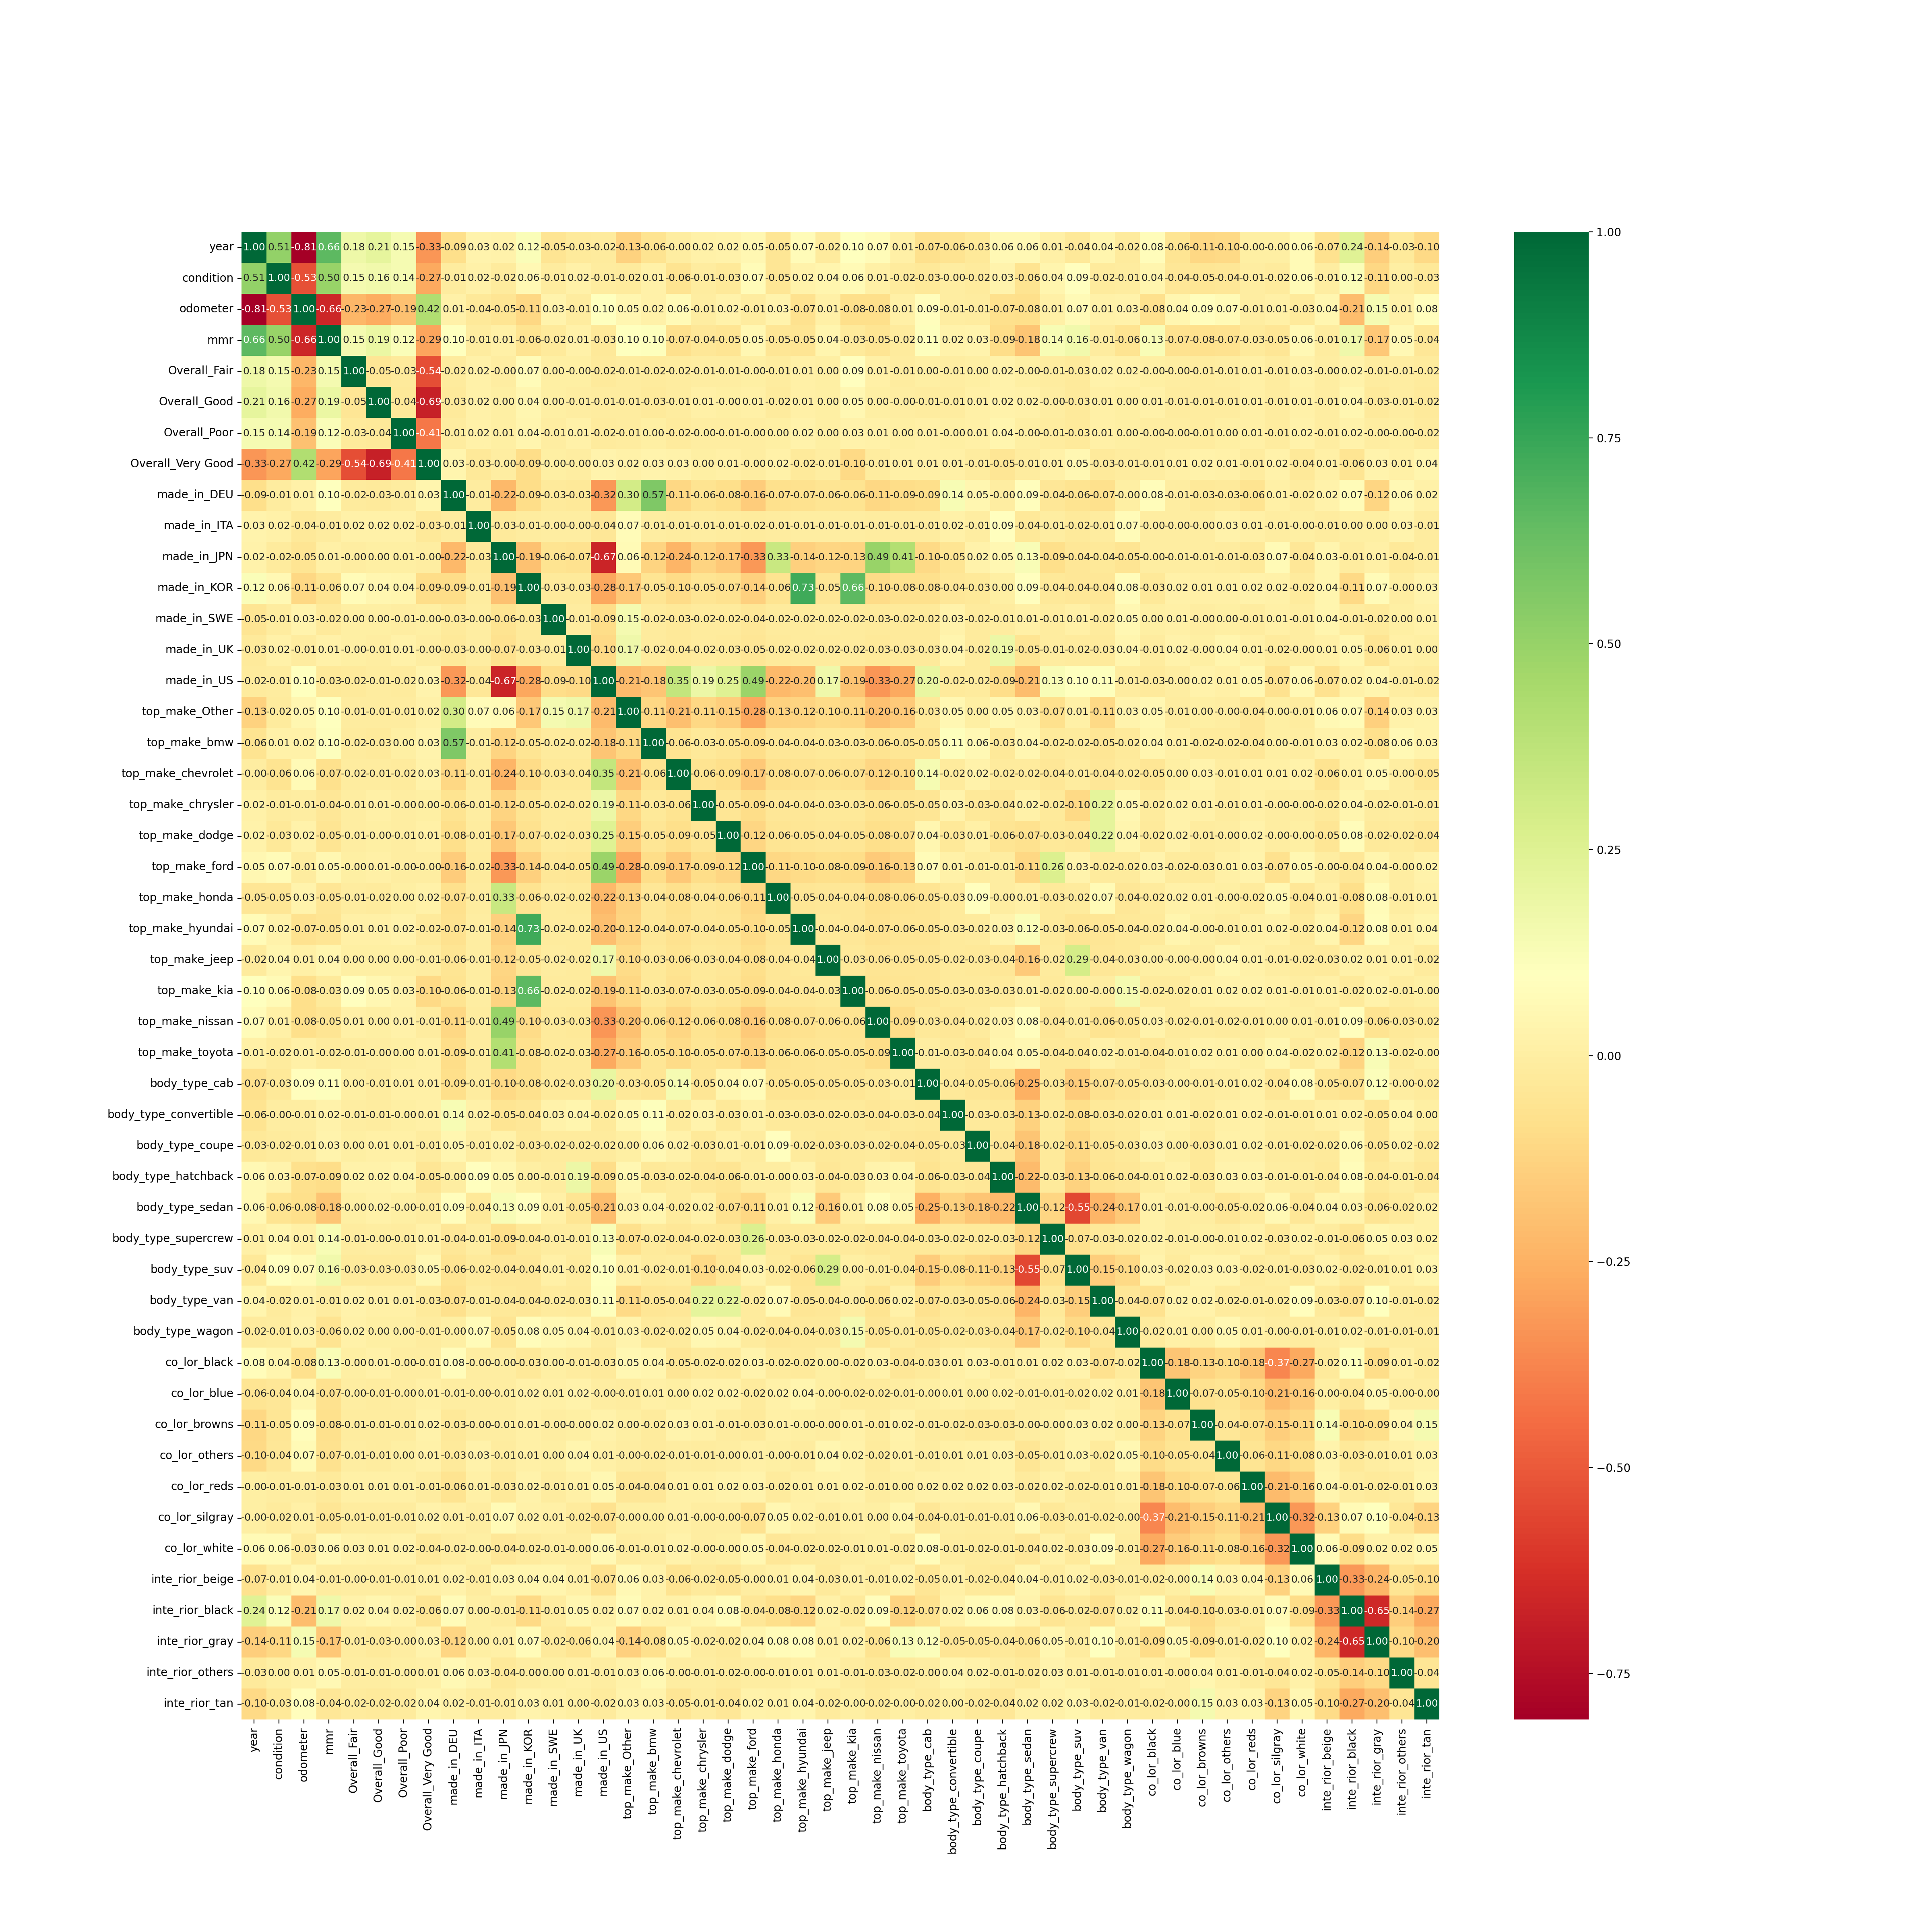

In [72]:
# Plot korelasi heatmap
corr_matrix = df_pre.corr()
f, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 9}, ax=ax)
plt.show()

In [73]:
delete = ['made_in_SWE', 'made_in_ITA', 'made_in_UK']
df_pre = df_pre.drop(delete, axis=1)

#### Target Encoding

In [74]:
pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.6 MB/s eta 0:00:00


In [75]:
from category_encoders import TargetEncoder

cols = ['model', 'trim', 'state']
target = 'mmr'

encoder = TargetEncoder()
df_pre[cols] = encoder.fit_transform(df_pre[cols], df_pre[target])

In [76]:
# Count Encoding untuk fitur seller
count_encoding_seller = df_pre['seller'].value_counts().to_dict()
df_pre['seller'] = df_pre['seller'].map(count_encoding_seller)

## Train-Test Split

In [77]:
dfnew = df_pre.copy()

In [78]:
from sklearn.model_selection import train_test_split

features = dfnew.select_dtypes(["float64", "int64", "boolean", "uint8"]).columns
x = dfnew[features].drop('mmr', axis=1)
y = dfnew.mmr

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

### Pre-Processing

In [79]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler    = MinMaxScaler()
n = ['year', 'odometer', 'condition']
xtrain[n] = scaler.fit_transform(xtrain[n])
xtest[n] = scaler.transform(xtest[n])

In [80]:
xtrain.describe()

year      model       trim      state  condition   odometer  \
count 422244.000 422244.000 422244.000 422244.000 422244.000 422244.000   
mean       0.717  13095.089  13105.875  13091.814      0.608      0.321   
std        0.216   4868.135   4465.104   1804.508      0.230      0.227   
min        0.000    825.353   1212.431   7514.809      0.000      0.000   
25%        0.588   9808.195  10957.675  12822.675      0.425      0.142   
50%        0.824  12575.058  12242.339  13271.470      0.650      0.256   
75%        0.882  16238.533  15207.488  14033.186      0.800      0.473   
max        1.000  33180.335  32474.002  17082.222      1.000      1.000   

          seller  Overall_Fair  Overall_Good  Overall_Poor  ...  \
count 422244.000    422244.000    422244.000    422244.000  ...   
mean    4527.550         0.035         0.056         0.021  ...   
std     6103.314         0.184         0.231         0.144  ...   
min        1.000         0.000         0.000         0.000  ...   
25%      123.000         0.000         0.000         0.000  ...   
50%     1633.000         0.000         0.000         0.000  ...   
75%     6069.000         0.000         0.000         0.000  ...   
max    19687.000         1.000         1.000         1.000  ...   

       co_lor_browns  co_lor_others  co_lor_reds  co_lor_silgray  \
count     422244.000     422244.000   422244.000      422244.000   
mean           0.048          0.029        0.095           0.303   
std            0.213          0.166        0.293           0.460   
min            0.000          0.000        0.000           0.000   
25%            0.000          0.000        0.000           0.000   
50%            0.000          0.000        0.000           0.000   
75%            0.000          0.000        0.000           1.000   
max            1.000          1.000        1.000           1.000   

       co_lor_white  inte_rior_beige  inte_rior_black  inte_rior_gray  \
count    422244.000       422244.000       422244.000      422244.000   
mean          0.191            0.106            0.471           0.322   
std           0.393            0.308            0.499           0.467   
min           0.000            0.000            0.000           0.000   
25%           0.000            0.000            0.000           0.000   
50%           0.000            0.000            0.000           0.000   
75%           0.000            0.000            1.000           1.000   
max           1.000            1.000            1.000           1.000   

       inte_rior_others  inte_rior_tan  
count        422244.000     422244.000  
mean              0.023          0.078  
std               0.148          0.268  
min               0.000          0.000  
25%               0.000          0.000  
50%               0.000          0.000  
75%               0.000          0.000  
max               1.000          1.000  

[8 rows x 48 columns]

# Modelling and Evaluation

## Modelling

### Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [82]:
y_pred = regressor.predict(xtest)
y_pred

array([ 8414.1003455 ,  9871.57804076, 19335.24135542, ...,
       12123.66593904,  5688.80951029, 21567.98875045])

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_regression(model, y_pred, xtrain, xtest, ytrain,  ytest):
    print("MAE: " , mean_absolute_error(ytest, y_pred))
    print("RMSE: " , mean_squared_error(ytest, y_pred, squared=False))
    print('R2 score: ', r2_score(ytest, y_pred))
    print('Coefficients: ', regressor.coef_)
    print('Intercept: ', regressor.intercept_)

eval_regression(regressor, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2399.8825522734383
RMSE:  3264.9569557897557
R2 score:  0.8155106417079235
Coefficients:  [ 9.80560004e+03  4.44697252e-01  3.74479974e-01  1.08702022e-01
  1.63781825e+03 -1.06788147e+04 -5.20532495e-02  6.60932917e+01
  3.20944275e+02 -3.63202996e+01 -3.50717267e+02 -2.33442661e+02
 -1.10320602e+02 -3.64113137e+03  2.33658370e+02  8.25822669e+02
  1.67687998e+03 -5.78654239e+02 -1.24248712e+03 -1.41529223e+03
 -1.34474674e+03  6.36142039e+02  2.19432236e+03 -1.54868771e+03
  1.28145254e+03 -7.73167589e+02  2.88416050e+02  1.87100790e+03
  3.40070249e+02 -3.91638412e+02 -3.14545496e+03 -1.48833089e+03
  3.87290159e+03  6.49607336e+02 -4.59867258e+02 -1.24829555e+03
  3.80933336e+02 -2.45433993e+02 -4.27389818e+01 -4.05527976e+01
 -6.78113069e+01  1.80466241e+01 -2.44288076e+00 -3.36095078e+01
 -1.64607009e+02 -6.26791122e+02  8.21747127e+02  3.26051127e+00]
Intercept:  -2028.0160715627444


In [84]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, fit_intercept=True)
lasso.fit(xtrain, ytrain)

Lasso(alpha=0.1)

In [85]:
y_pred = lasso.predict(xtest)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_lasso(model, y_pred, xtrain, xtest, ytrain,  ytest):
    print("MAE: " , mean_absolute_error(ytest, y_pred))
    print("RMSE: " , mean_squared_error(ytest, y_pred, squared=False))
    print('R2 score: ', r2_score(ytest, y_pred))
    print('Coefficients: ', lasso.coef_)
    print('Intercept: ', lasso.intercept_)

eval_lasso(lasso, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2399.844621537787
RMSE:  3264.974381545582
R2 score:  0.8155086723863473
Coefficients:  [ 9.80188304e+03  4.44863349e-01  3.74552659e-01  1.08805757e-01
  1.63709446e+03 -1.06778110e+04 -5.20756346e-02  9.42957848e+01
  3.50320664e+02 -0.00000000e+00 -3.19656910e+02 -2.19683609e+02
 -9.77934462e+01 -7.02936369e+02  2.39983801e+02  1.55932152e+03
  2.40389411e+03  1.58817199e+02 -5.01820227e+02 -6.75473697e+02
 -6.05280323e+02  1.36567620e+03  0.00000000e+00 -8.06613042e+02
 -9.08988681e+02 -3.98248469e+01  1.01854989e+03  2.26050390e+03
  7.26392439e+02  0.00000000e+00 -2.74986949e+03 -1.09610680e+03
  4.25578842e+03  1.04031092e+03 -6.72458710e+01 -8.53373577e+02
  4.20664790e+02 -2.04189524e+02 -0.00000000e+00 -0.00000000e+00
 -2.64444333e+01  5.77723961e+01  3.74514555e+01  0.00000000e+00
 -1.30670256e+02 -5.92438183e+02  8.51331829e+02  3.54926012e+01]
Intercept:  -3270.821680804618


In [86]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(xtrain, ytrain)

Ridge()

In [87]:
y_pred = ridge.predict(xtest)

print("MAE: " , mean_absolute_error(ytest, y_pred))
print("RMSE: " , mean_squared_error(ytest, y_pred, squared=False))
print('R2 score: ', r2_score(ytest, y_pred))
print('Coefficients: ', ridge.coef_)
print('Intercept: ', ridge.intercept_)

MAE:  2399.8874283317355
RMSE:  3264.965244470226
R2 score:  0.8155097049878977
Coefficients:  [ 9.80519934e+03  4.44712636e-01  3.74491194e-01  1.08715414e-01
  1.63809023e+03 -1.06781005e+04 -5.20471417e-02  6.61390112e+01
  3.20960260e+02 -3.62428416e+01 -3.50856429e+02 -2.33045553e+02
 -1.09971982e+02 -2.38499401e+03  2.33874095e+02  1.03499956e+03
  1.88577397e+03 -3.69234962e+02 -1.03302272e+03 -1.20582376e+03
 -1.13532192e+03  8.45347611e+02  1.14778368e+03 -1.33921040e+03
  2.34961320e+02 -5.63892940e+02  4.97640562e+02  1.87087127e+03
  3.40137181e+02 -3.91551670e+02 -3.14508144e+03 -1.48822067e+03
  3.87216850e+03  6.49599469e+02 -4.59820115e+02 -1.24810252e+03
  3.80946339e+02 -2.45446348e+02 -4.27347349e+01 -4.05996400e+01
 -6.78160732e+01  1.80637944e+01 -2.41333750e+00 -3.35887439e+01
 -1.64567658e+02 -6.26771029e+02  8.21690633e+02  3.23679855e+00]
Intercept:  -2238.2383763456146


### Random Forest Regression

In [88]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104, verbose=False)
rf.fit(xtrain, ytrain)
ytrain_pred = rf.predict(xtrain)
ytest_pred = rf.predict(xtest)

In [89]:
def evaluasi(model, ytrain_pred, ytest_pred, xtrain, xtest, ytrain,  ytest):
    print("MAE train: " , mean_absolute_error(ytrain, ytrain_pred))
    print("MAE test: " , mean_absolute_error(ytest, ytest_pred))
    print("RMSE train: " , mean_squared_error(ytrain, ytrain_pred, squared=False))
    print("RMSE test: " , mean_squared_error(ytest, ytest_pred, squared=False))
    print('R2 score train: ', r2_score(ytrain, ytrain_pred))
    print('R2 score test: ', r2_score(ytest, ytest_pred))

evaluasi(rf, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  256.3826786171029
MAE test:  691.8286078323639
RMSE train:  468.88227207307784
RMSE test:  1263.3932031656896
R2 score train:  0.9961667950882951
R2 score test:  0.9723755606586839


### CatBoost Regressor

In [90]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.5 MB/s eta 0:00:00


In [91]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(verbose=False)
catboost.fit(xtrain, ytrain)

In [92]:
ytrain_pred = catboost.predict(xtrain)
ytest_pred = catboost.predict(xtest)
evaluasi(catboost, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  935.1822812265568
MAE test:  949.6114917085861
RMSE train:  1476.3388890534839
RMSE test:  1509.142565312775
R2 score train:  0.9619979933118749
R2 score test:  0.960583601749797


### XGBoost

In [93]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [94]:
ytrain_pred = xgb_regressor.predict(xtrain)
ytest_pred = xgb_regressor.predict(xtest)
evaluasi(xgb_regressor, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  1003.0365001681679
MAE test:  1024.7942413255473
RMSE train:  1557.2587619415287
RMSE test:  1608.6885214151205
R2 score train:  0.9577179557391181
R2 score test:  0.9552121385426879


## Evaluation

### Feature Importance

In [95]:
# Make feature importance graph
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
ax = feat_importances.nlargest(15).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('Feature Importance Score')

Text(0.5, 1.0, 'Feature Importance Score')

#### SHAP Value

In [96]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 3.4 MB/s eta 0:00:00


In [97]:
import shap
explainer = shap.TreeExplainer(catboost)
shap_values = explainer.shap_values(xtest)
shap.summary_plot(shap_values, xtest)

#### Cross Validation

In [98]:
from sklearn.model_selection import cross_validate

SEED = 101
np.random.seed(SEED)

model_cv = CatBoostRegressor(verbose=False)
scores = cross_validate(model_cv, xtrain, ytrain, cv = 5, return_train_score=False)
media = scores['test_score'].mean()
std_dev = scores['test_score'].std()
print("Accuracy with cross validation, 5 = [%.2f%%, %.2f%%]" % ((media - 2 * std_dev)*100, (media + 2 * std_dev) * 100))

Accuracy with cross validation, 5 = [95.92%, 96.10%]


### New Selling Price

In [99]:
# Real Price X Predict Price
df_pred = pd.DataFrame(columns=['mmr', 'sellingprice_predicted'])
df_pred['mmr'] = ytest
rf_model = RandomForestRegressor(verbose=False)
rf_model.fit(xtrain, ytrain)
df_pred['sellingprice_predicted'] = rf_model.predict(xtest)
df_pred

mmr  sellingprice_predicted
262193   8775                8932.500
392466   8100                7564.250
524832  20300               19951.500
286417   2500                2710.250
323786  16050               15946.500
...       ...                     ...
274895  14800               14514.000
382225  14700               16444.000
495101  11600               12087.000
175086   5425                5300.500
181557  19100               18844.500

[105562 rows x 2 columns]

In [101]:
df_pred['is_below_mmr'] = df_pred.apply(lambda x: 1 if x.sellingprice_predicted < x.mmr else 0, axis=1)

transaction = df_pred.groupby('is_below_mmr').agg({'mmr':'count'}).rename({'mmr':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

total_transaction  percentage
is_below_mmr                               
0                         54688      51.810
1                         50874      48.190

Dengan sample sebesar 20%, prediksi harga yang dibuat berhasil menurunkan persentase harga dibawah mmr, dimana sebelumnya persentase selling price dibawah mmr adalah sebesar 51%.

In [103]:
def displayMeanSP(df):
    spAboveMMR=[]
    spBelowMMR=[]

    for index, row in df.iterrows():
      if row['is_below_mmr'] == 1:
        spBelowMMR.append(row['sellingprice_predicted'])
      else:
        spAboveMMR.append(row['sellingprice_predicted'])

    print(f'Mean of Selling Price above MMR = {sum(spAboveMMR)/len(spAboveMMR)}')
    print(f'Mean of Selling Price below MMR = {sum(spBelowMMR)/len(spBelowMMR)}')

displayMeanSP(df_pred)

Mean of Selling Price above MMR = 12767.214503181685
Mean of Selling Price below MMR = 13427.183438495105


# Kesimpulan

Setelah dilakukan pemodelan, rata-rata harga dibawah mmr adalah sebesar 13427. Jika dibandingkan dengan rata-rata harga mobil yang dijual dibawah mmr sebelumnya yaitu 12523, kita bisa menarik kesimpulan bahwa harga mobil seharusnya bisa dijual lebih tinggi 1000 dolar, sehingga kita bisa mendapatkan profit lebih banyak.

Begitu pula dengan rata-rata mobil yang dijual diatas mmr yaitu 12767 jika dibandingkan dengan yang sebelumnya yaitu 14754. Kita bisa mengatakan bahwa seharusnya harga mobil bisa dijual sedikit lebih murah 2000 dolar agar harga tidak terlalu terlampau mahal.